In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Rainfall.csv')

In [3]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [4]:
pd.set_option("display.max_columns",None)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [7]:
categorical_features = [column_name for column_name in df.columns if df[column_name].dtype == 'O']
print("Number of Categorical Features: {}".format(len(categorical_features)))
print("Categorical Features: ",categorical_features)

Number of Categorical Features: 7
Categorical Features:  ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [14]:
numerical_features = [column_name for column_name in df.columns if df[column_name].dtype != 'O']
print("Number of Numerical Features: {}".format(len(numerical_features)))
print("Numerical Features: ",numerical_features)

Number of Numerical Features: 20
Numerical Features:  ['Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'year', 'month', 'day']


In [9]:
for each_feature in categorical_features:
    print("Cardinality(no. of unique values) of {} are: {}".format(each_feature,len(df[each_feature].unique())))

Cardinality(no. of unique values) of Date are: 3004
Cardinality(no. of unique values) of Location are: 12
Cardinality(no. of unique values) of WindGustDir are: 17
Cardinality(no. of unique values) of WindDir9am are: 17
Cardinality(no. of unique values) of WindDir3pm are: 17
Cardinality(no. of unique values) of RainToday are: 3
Cardinality(no. of unique values) of RainTomorrow are: 3


In [11]:
df['Date'] = pd.to_datetime(df['Date'])

In [12]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

In [15]:
df.drop('Date', axis = 1, inplace = True)

In [16]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [20]:
categorical_features = [column_name for column_name in df.columns if df[column_name].dtype == 'O']
print("Number of Categorical Features: {}".format(len(categorical_features)))
print("Categorical Features: ",categorical_features)

Number of Categorical Features: 6
Categorical Features:  ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [21]:
numerical_features = [column_name for column_name in df.columns if df[column_name].dtype != 'O']
print("Number of Numerical Features: {}".format(len(numerical_features)))
print("Numerical Features: ",numerical_features)

Number of Numerical Features: 19
Numerical Features:  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'year', 'month', 'day']


In [22]:
df[categorical_features].isnull().sum()

Location          0
WindGustDir     991
WindDir9am      829
WindDir3pm      308
RainToday       240
RainTomorrow    239
dtype: int64

In [24]:
categorical_features_with_null = [feature for feature in categorical_features if df[feature].isnull().sum()]

In [25]:
for each_feature in categorical_features_with_null:
    mode_val = df[each_feature].mode()[0]
    df[each_feature].fillna(mode_val,inplace=True)

In [26]:
df[categorical_features].isnull().sum()

Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

In [27]:
df[numerical_features].isnull().sum()

MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustSpeed     991
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
year                0
month               0
day                 0
dtype: int64

<Axes: >

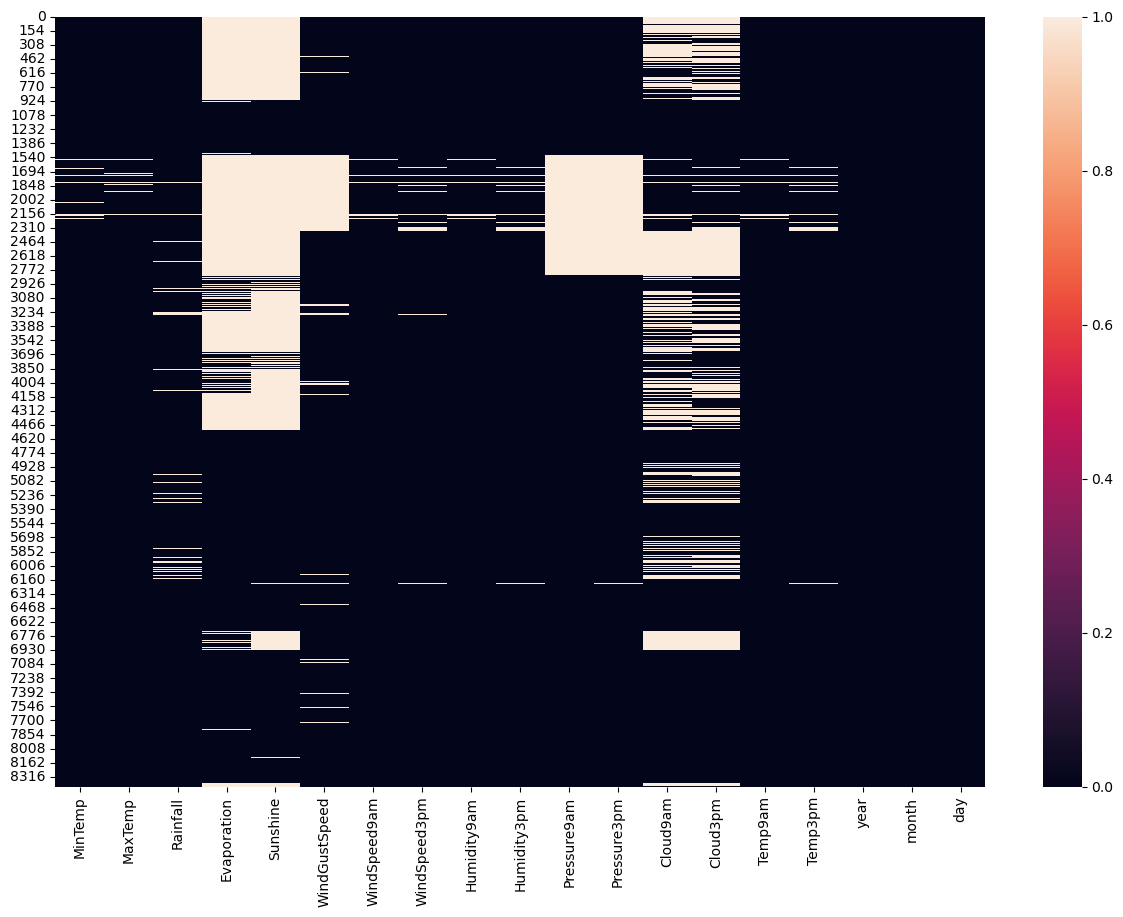

In [28]:
plt.figure(figsize=(15,10))
sns.heatmap(df[numerical_features].isnull(),linecolor='white')

<Axes: >

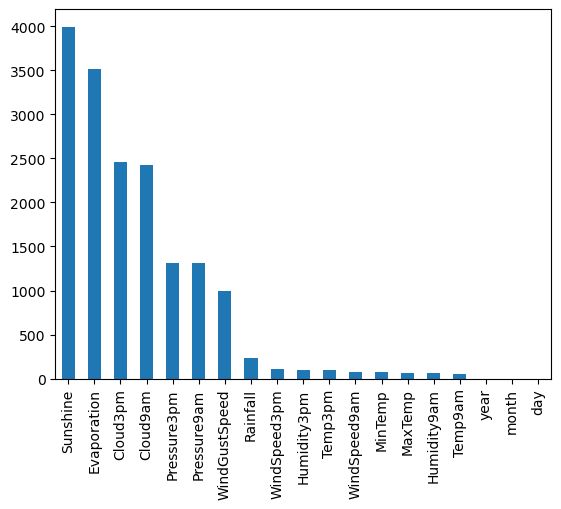

In [29]:
df[numerical_features].isnull().sum().sort_values(ascending = False).plot(kind = 'bar')

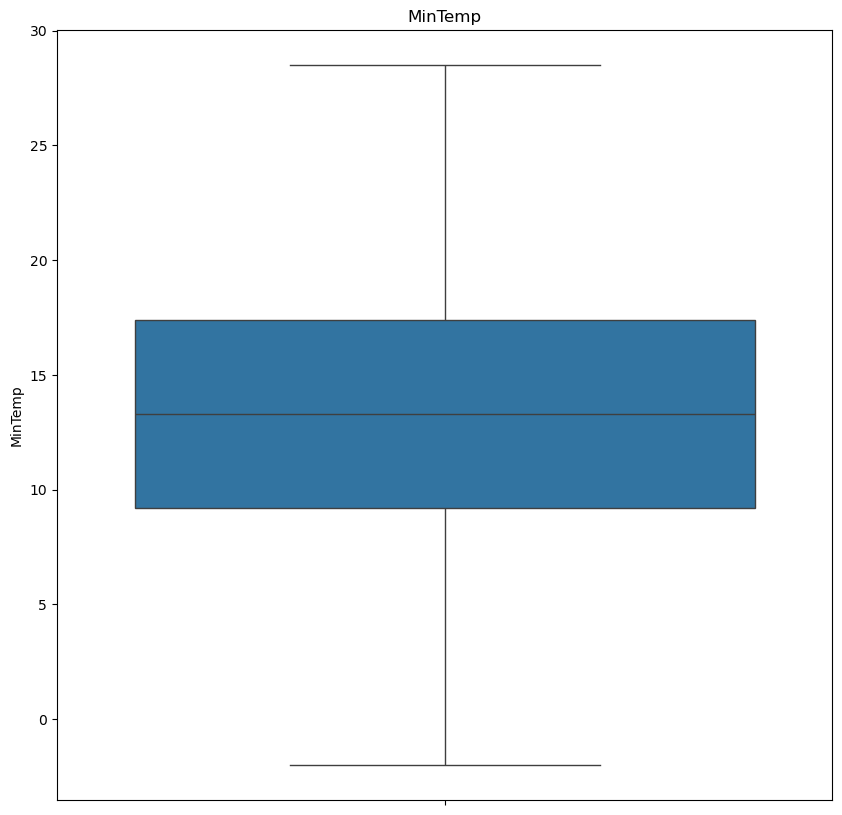

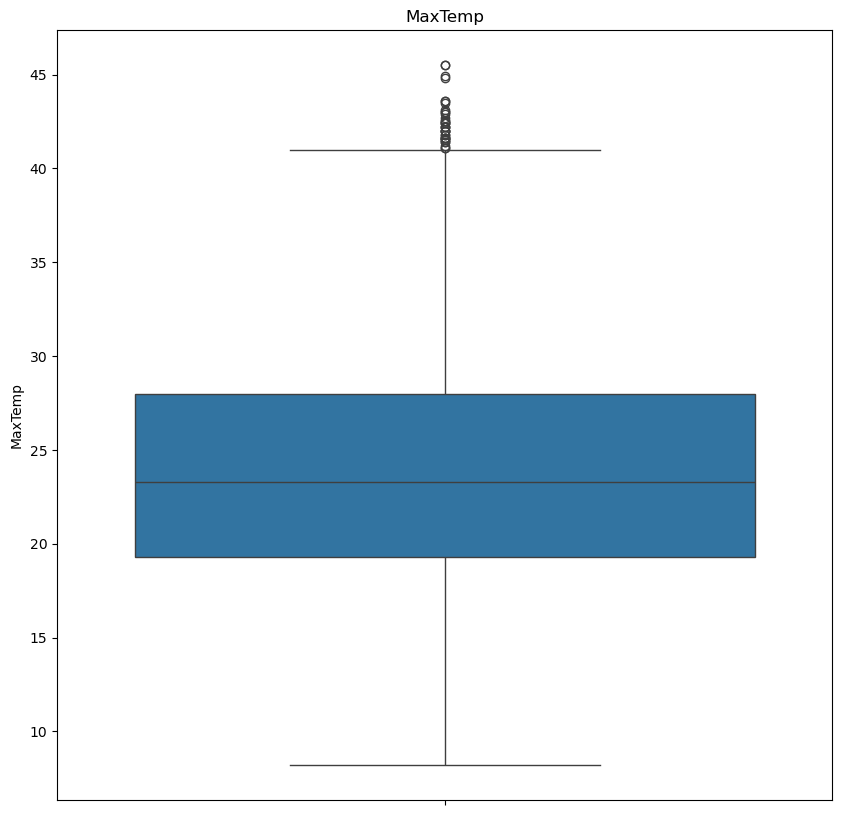

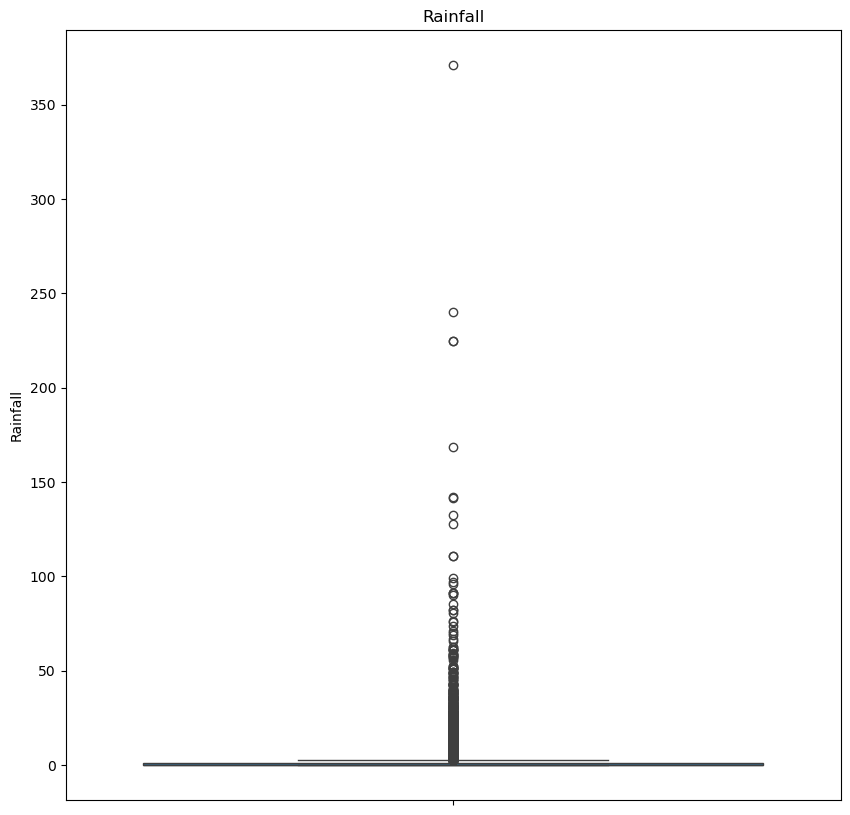

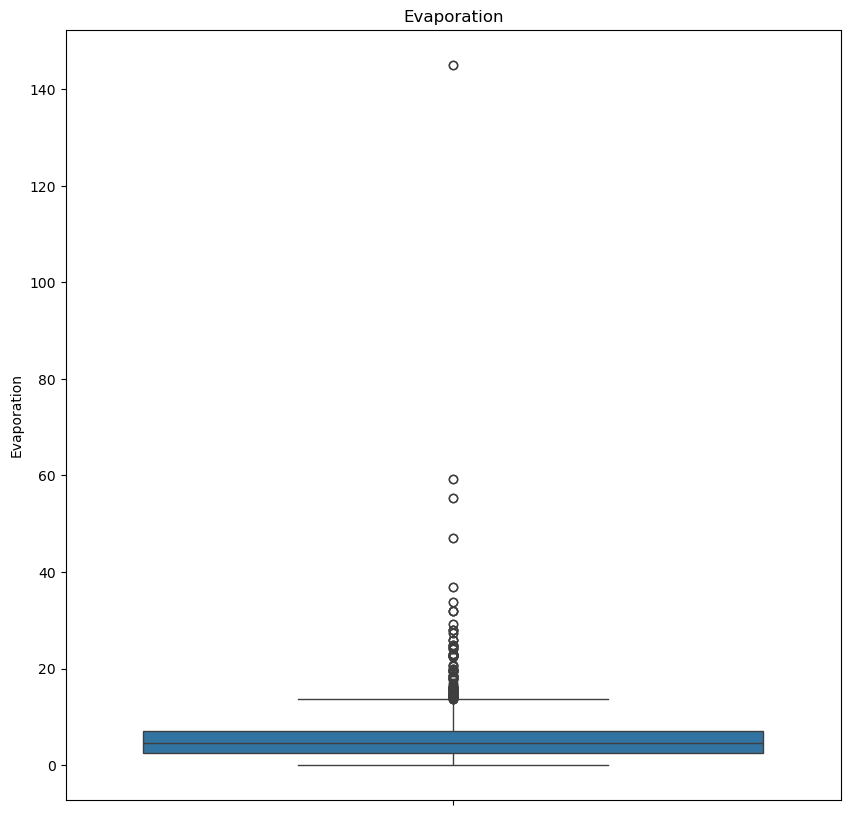

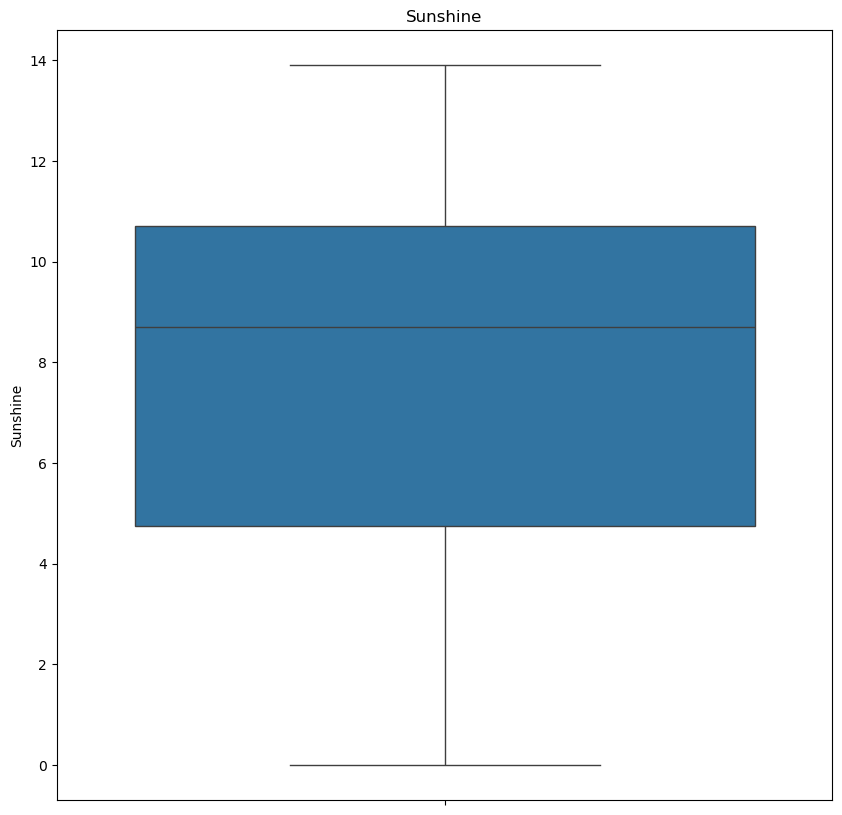

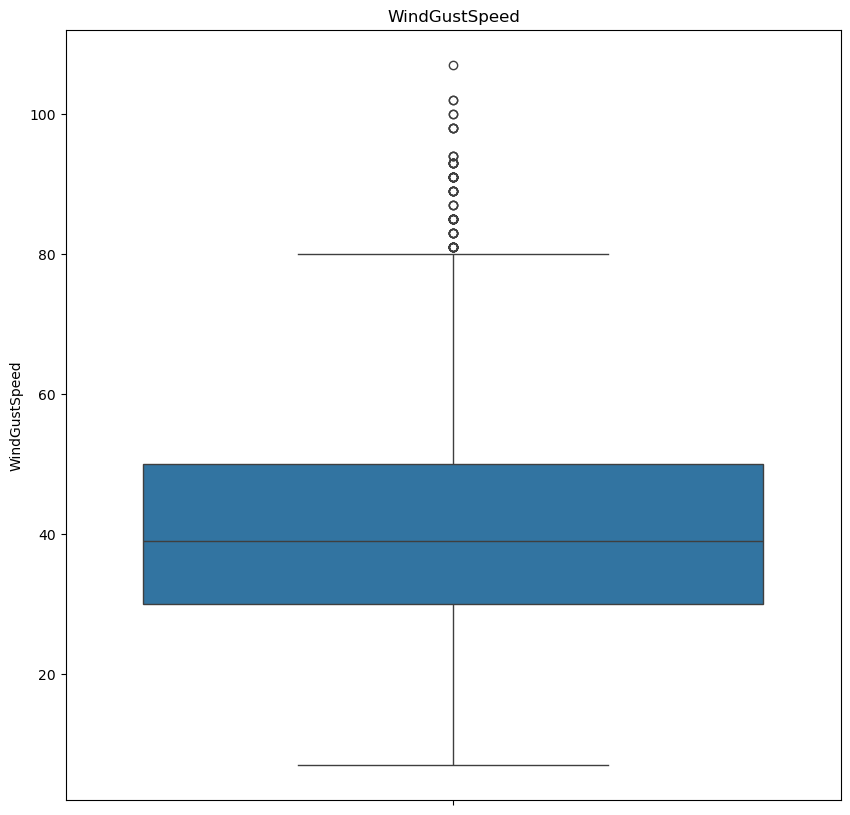

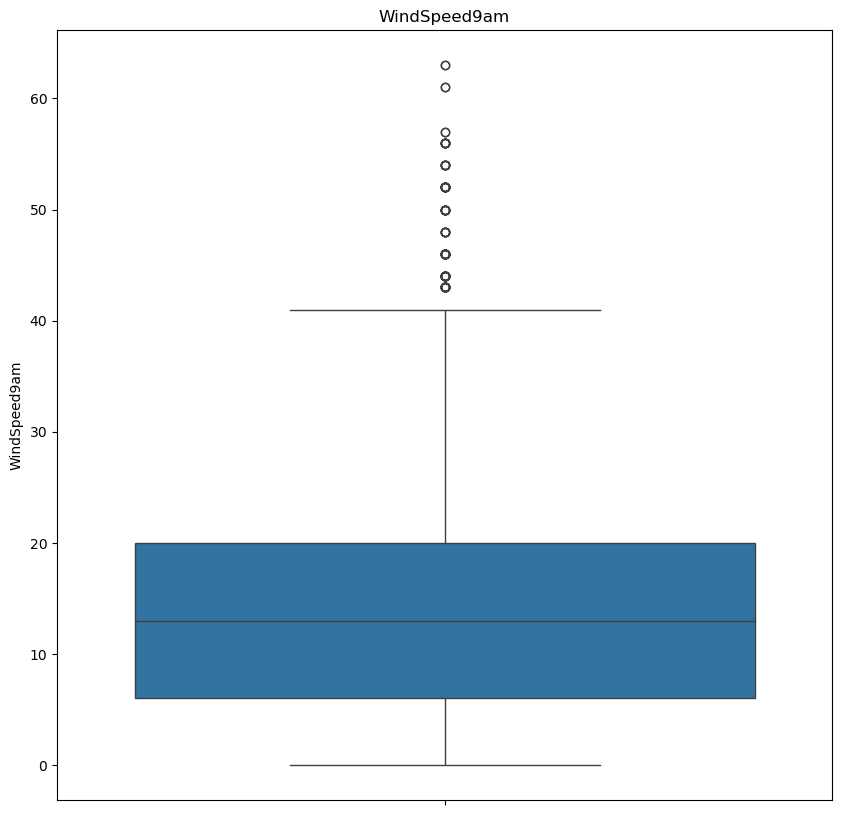

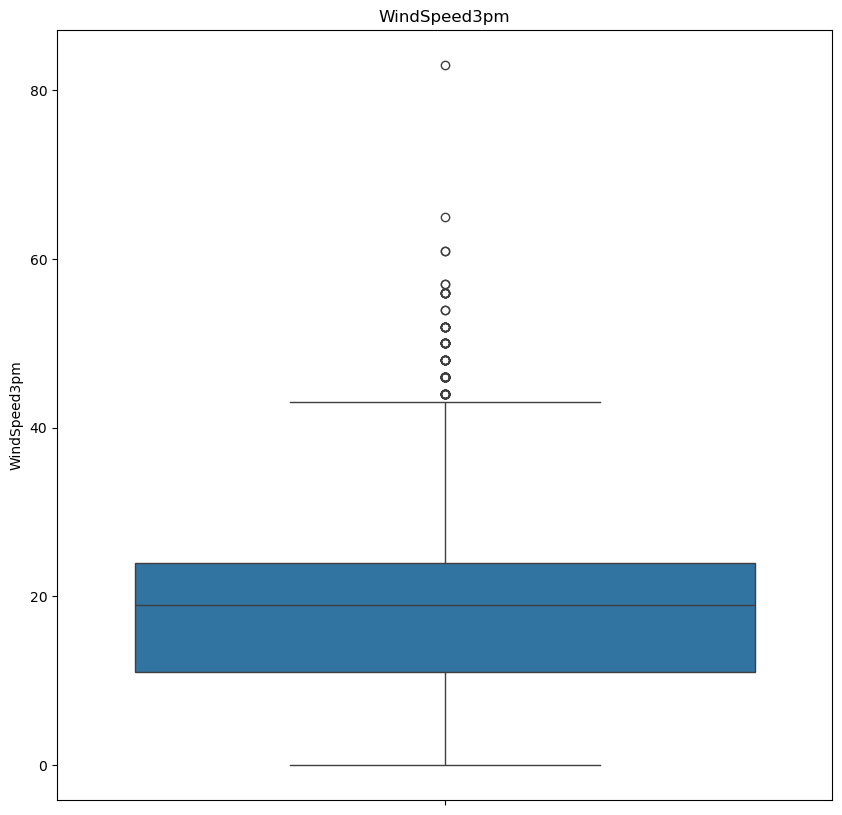

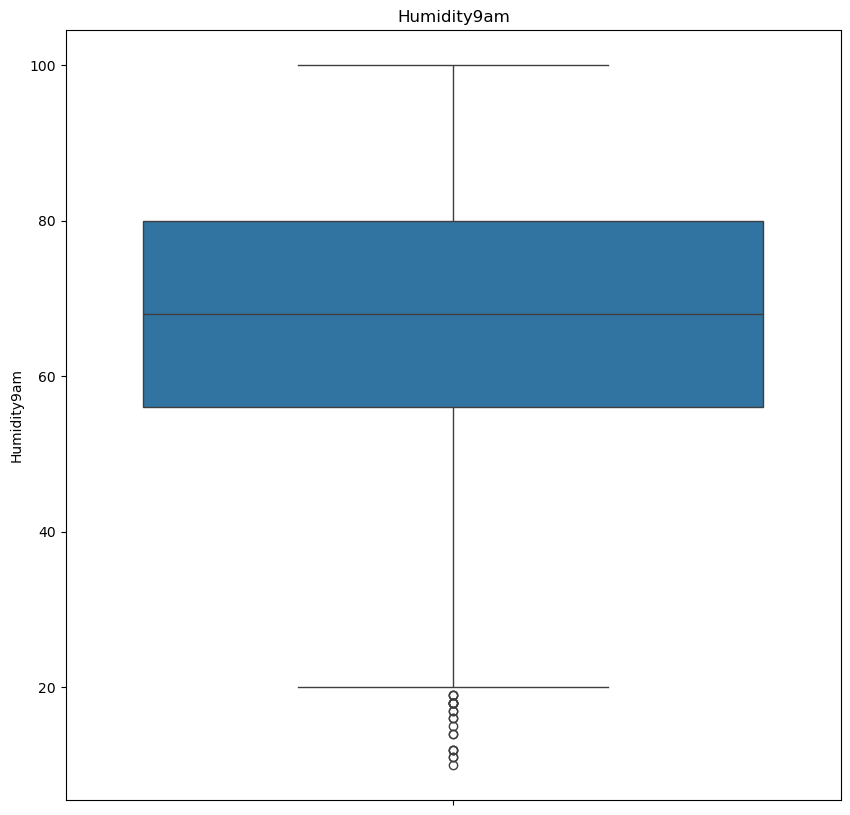

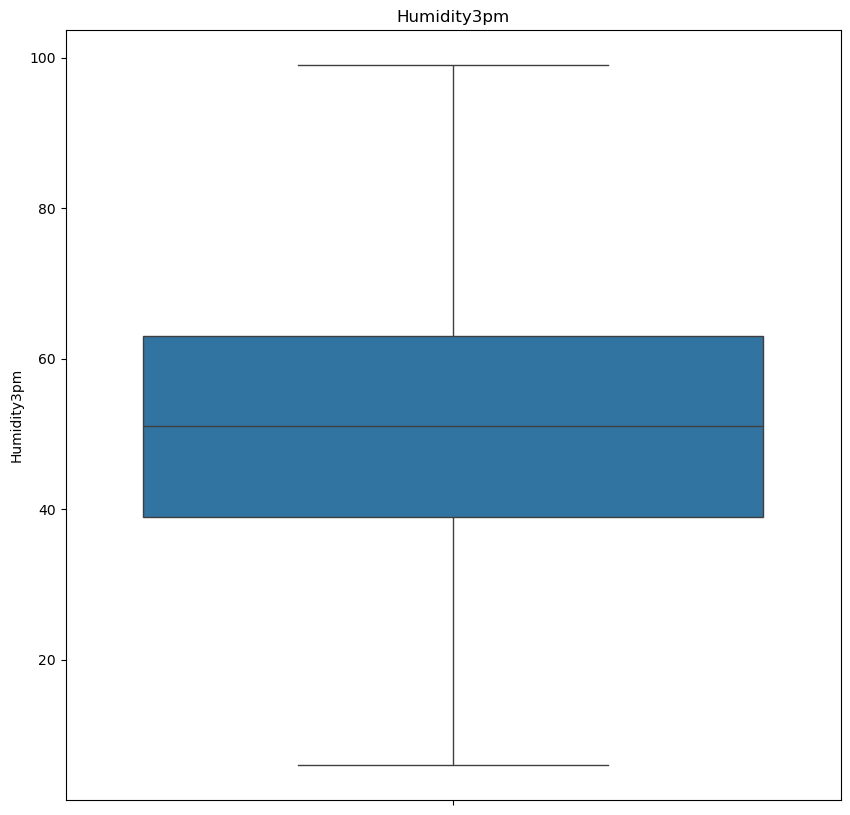

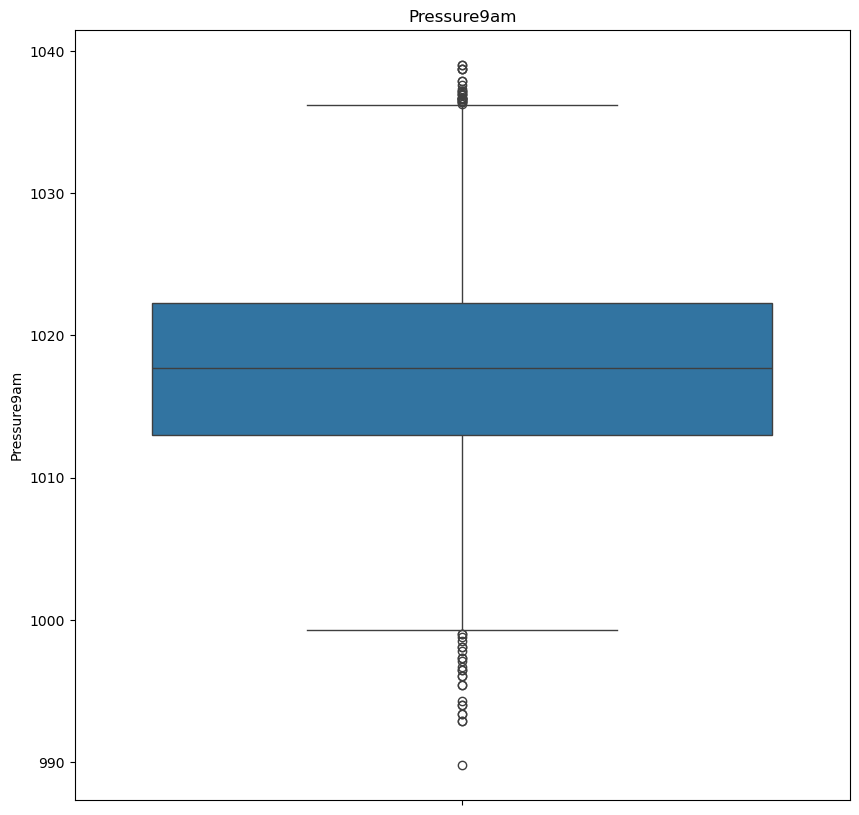

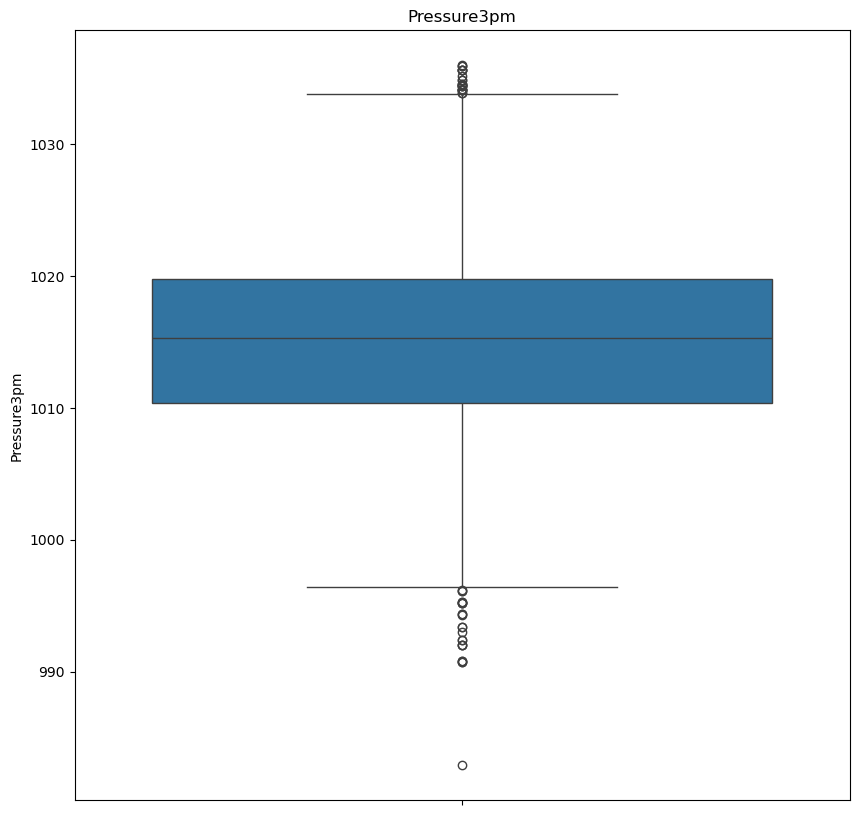

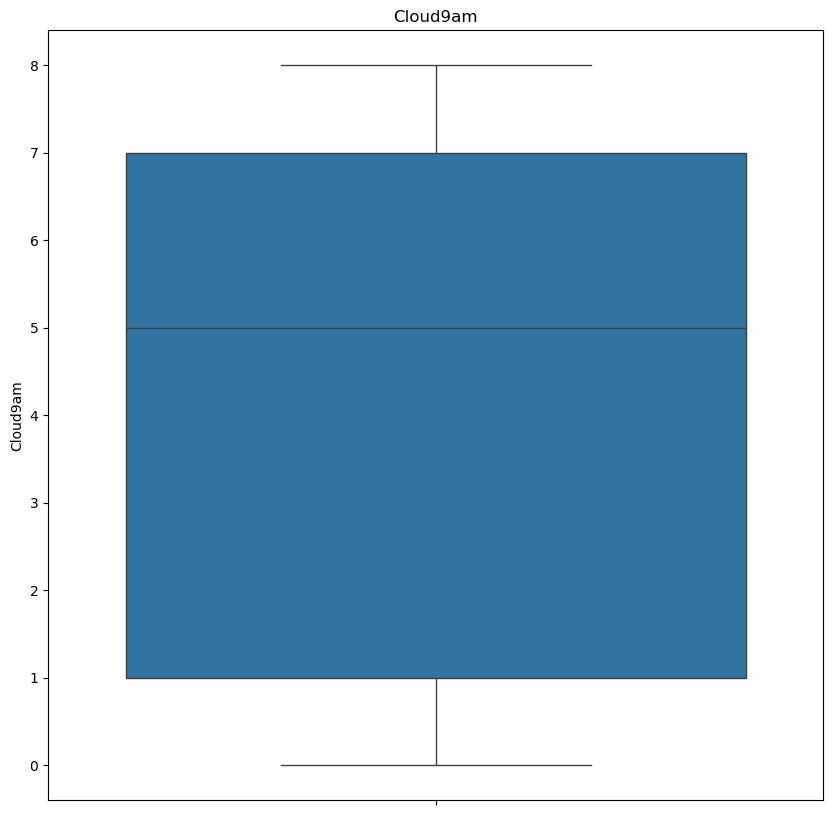

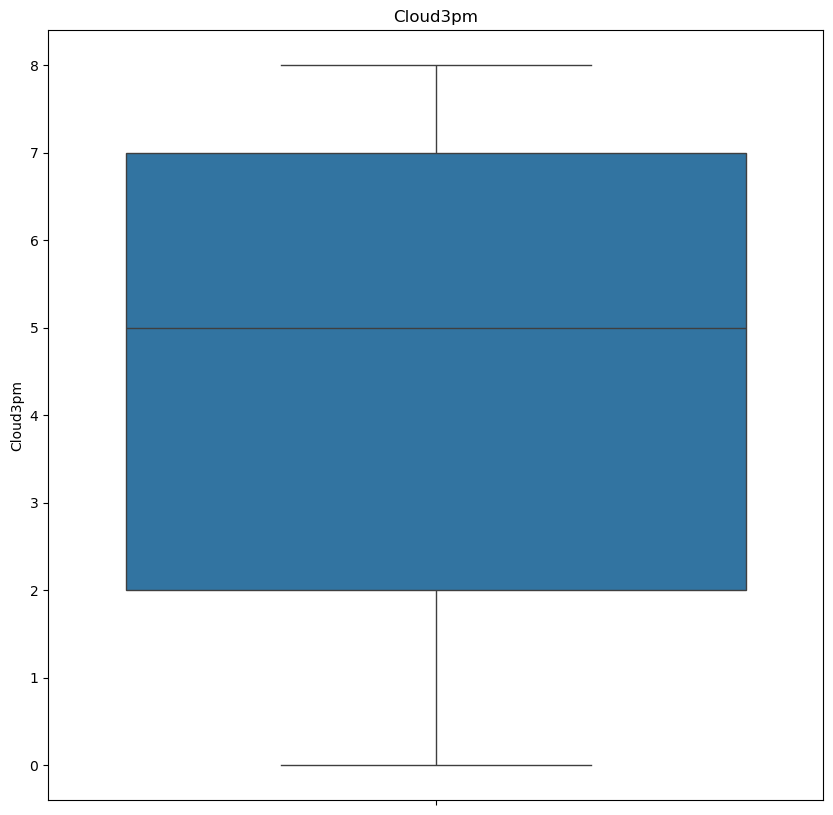

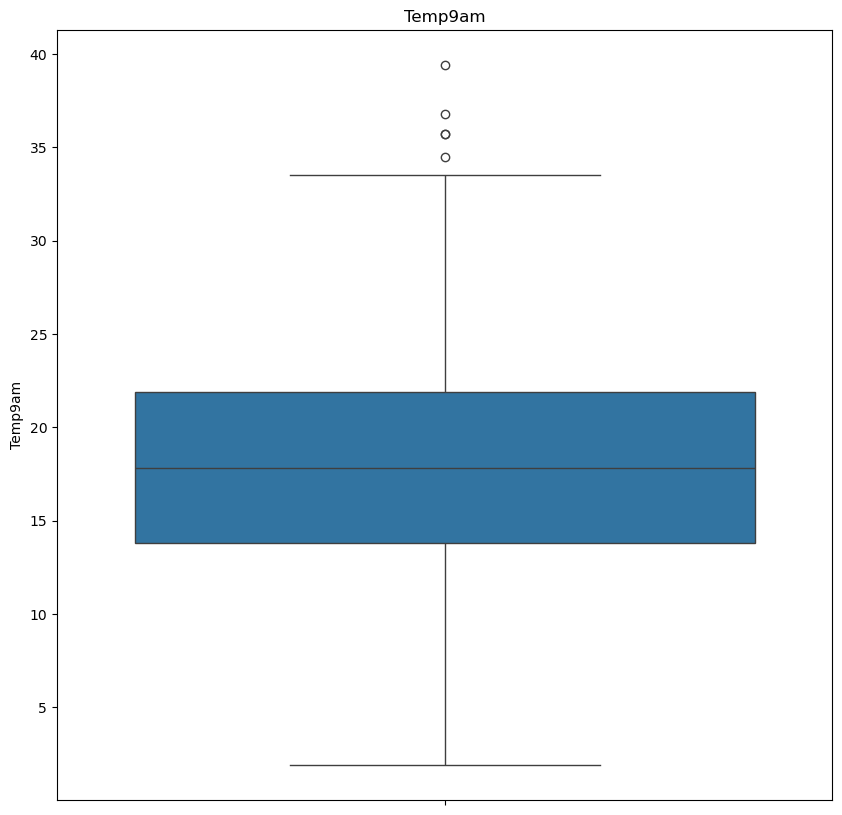

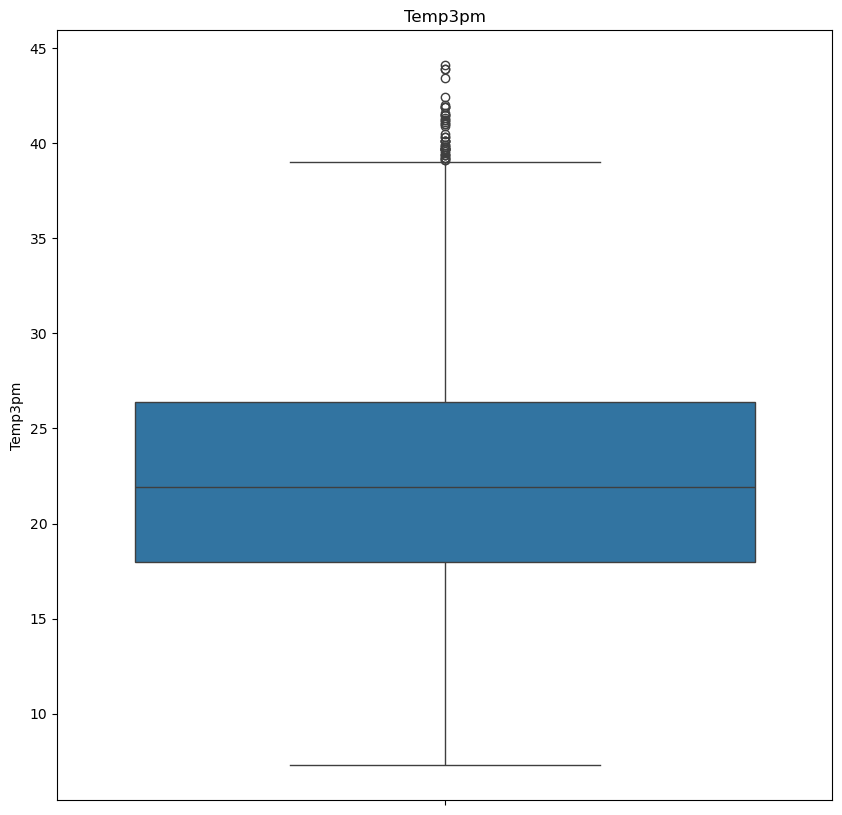

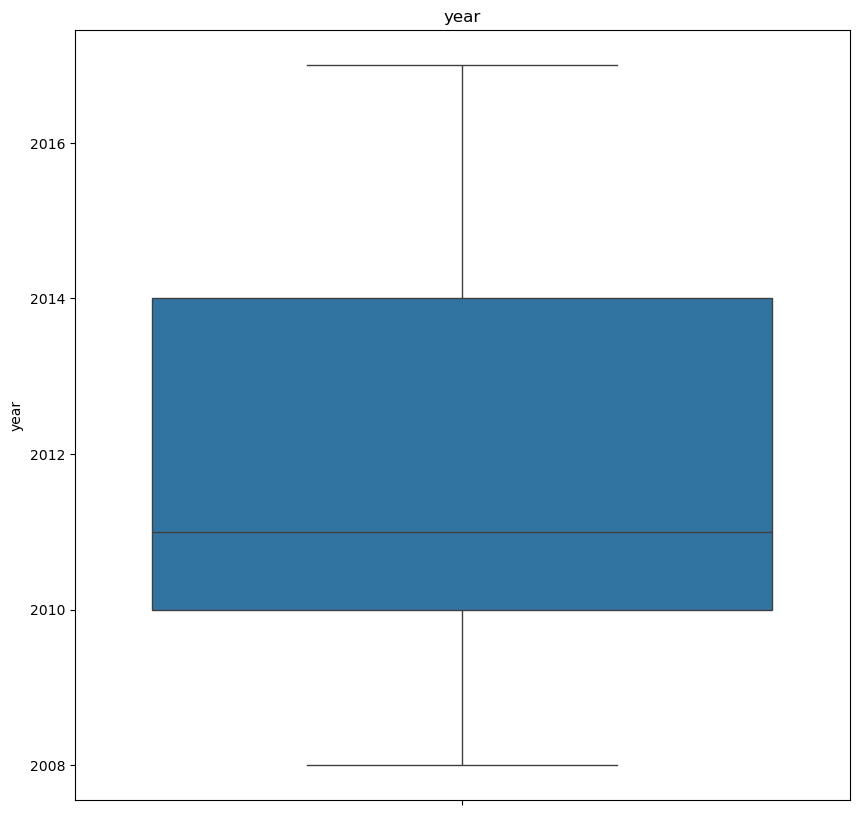

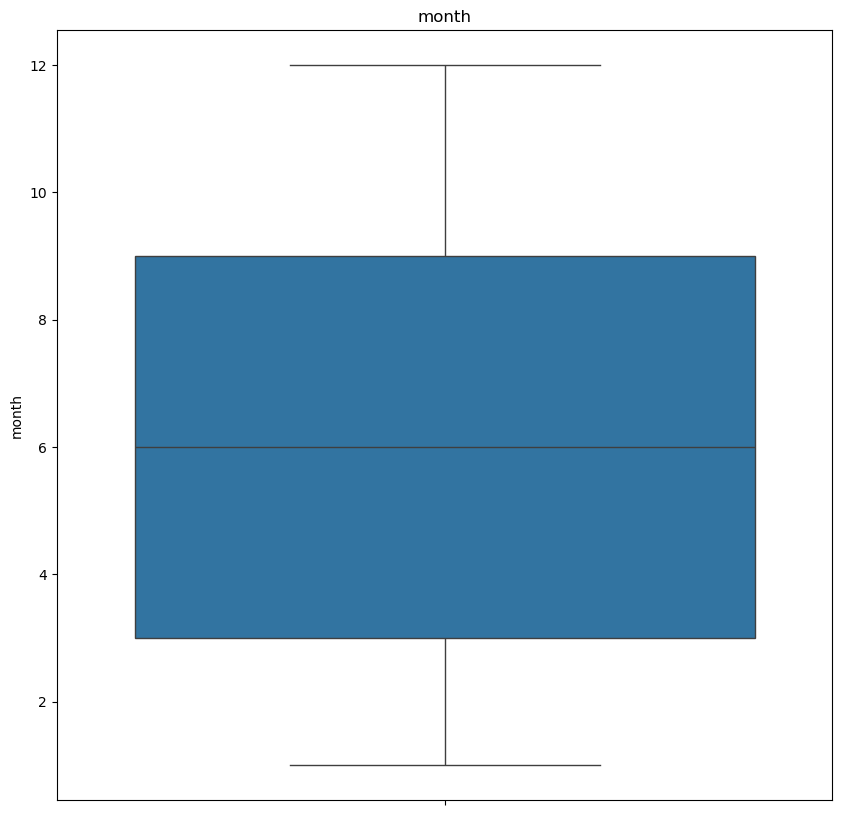

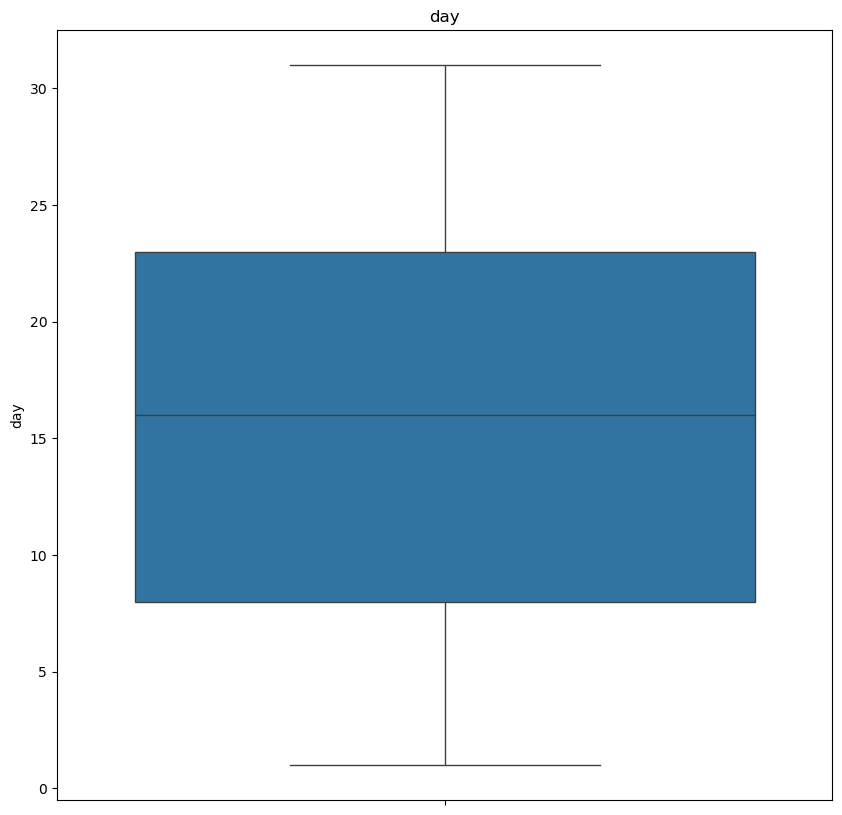

In [30]:
for feature in numerical_features:
    plt.figure(figsize=(10,10))
    sns.boxplot(df[feature])
    plt.title(feature)

In [31]:
df[numerical_features].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,year,month,day
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000,8425.000000,8425.000000,8425.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934,2012.102433,6.442136,15.741958
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020,2.473137,3.437994,8.787354
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000,2008.000000,1.000000,1.000000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000,2010.000000,3.000000,8.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000,2011.000000,6.000000,16.000000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000,2014.000000,9.000000,23.000000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000,2017.000000,12.000000,31.000000


In [32]:
features_with_outliers = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']

In [33]:
for feature in features_with_outliers:
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    df.loc[df[feature]<lower_limit,feature] = lower_limit
    df.loc[df[feature]>upper_limit,feature] = upper_limit

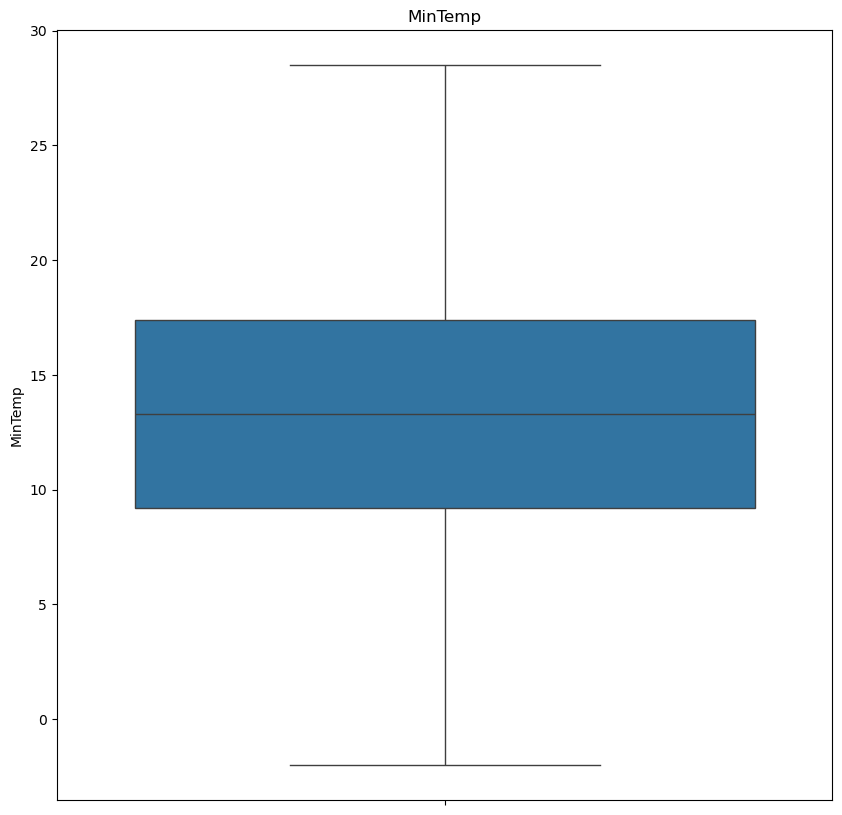

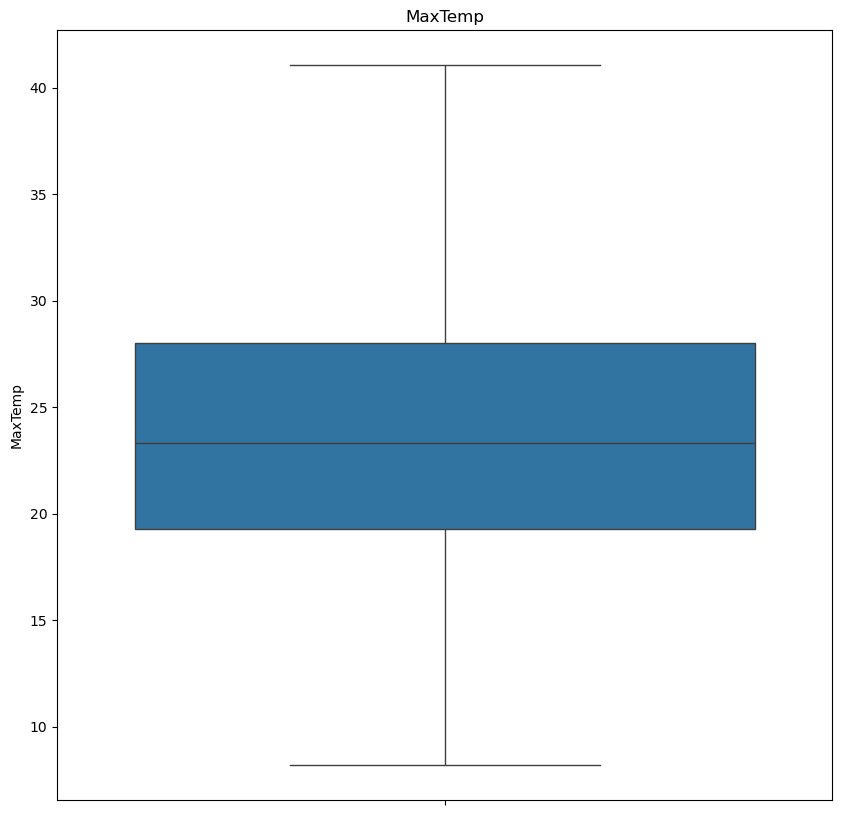

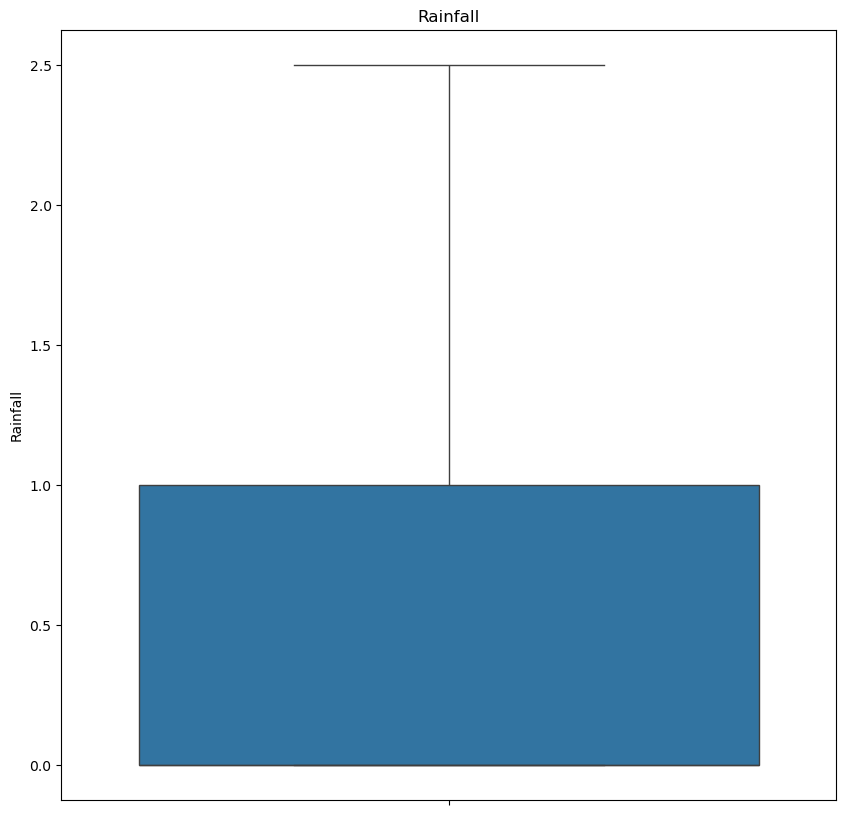

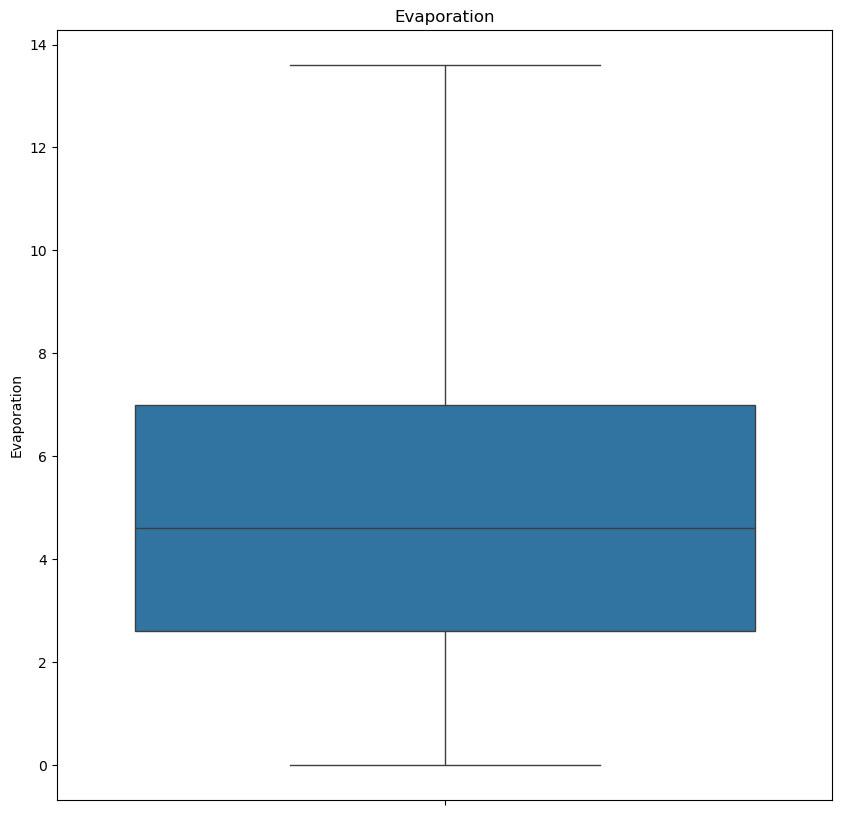

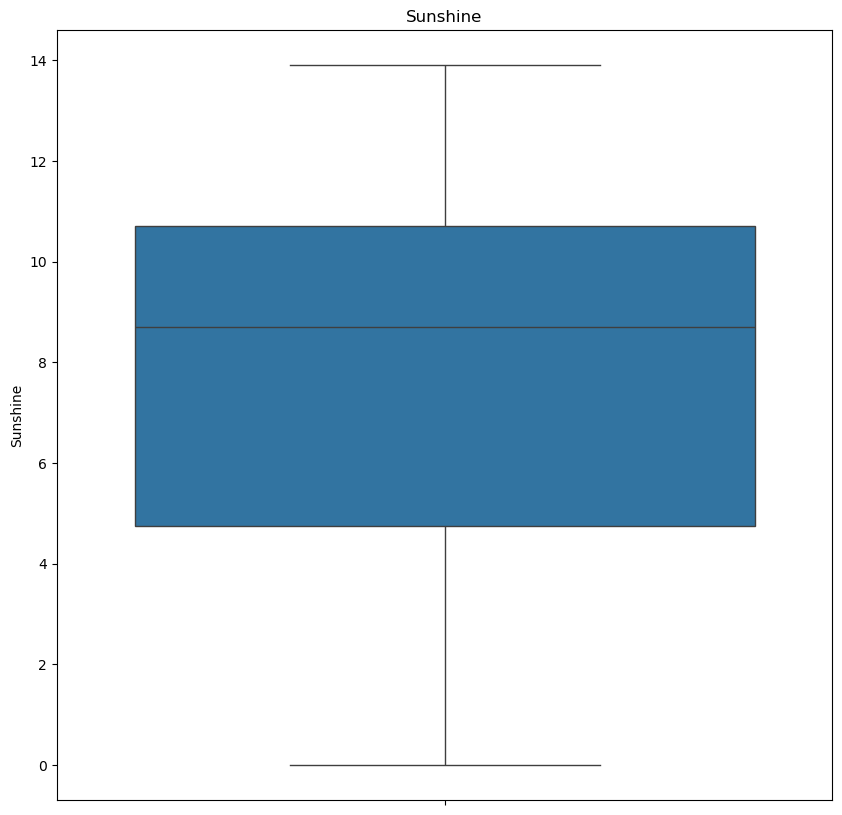

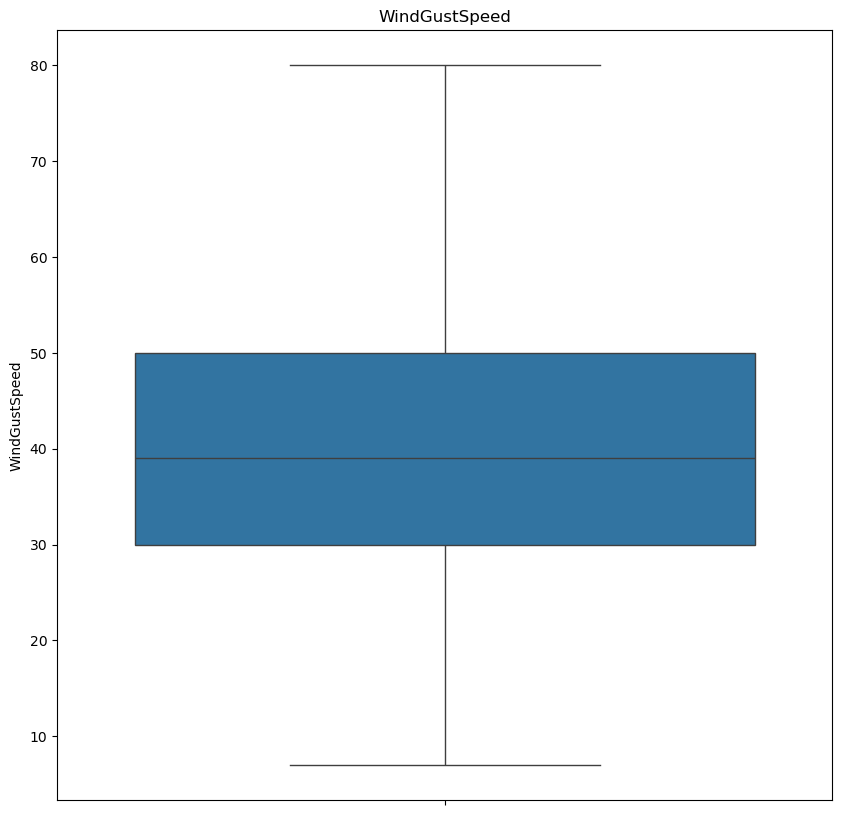

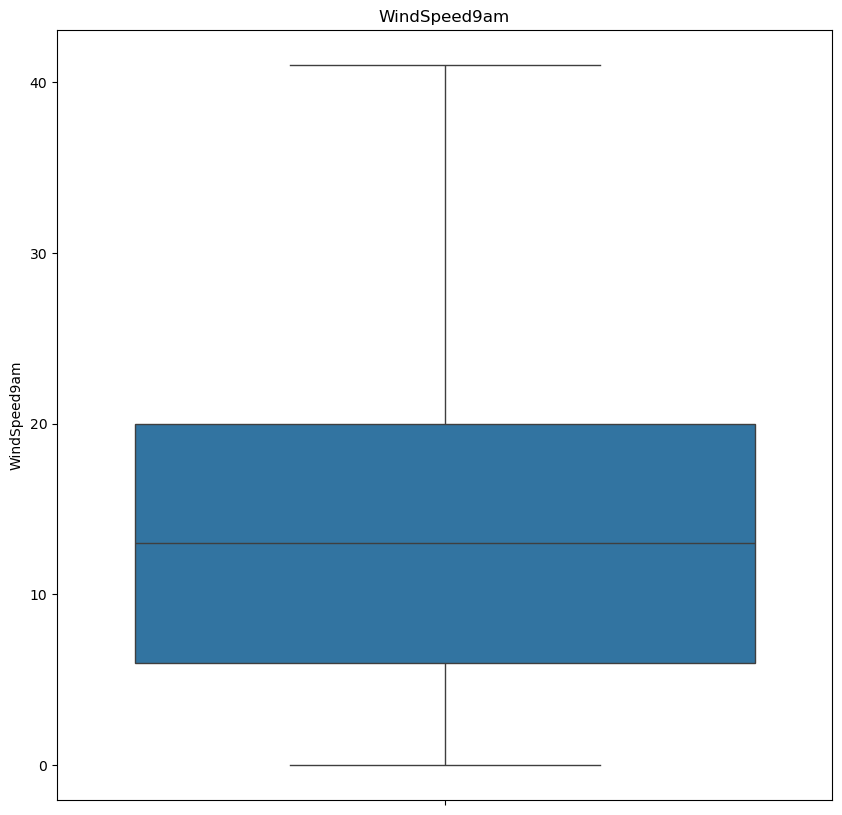

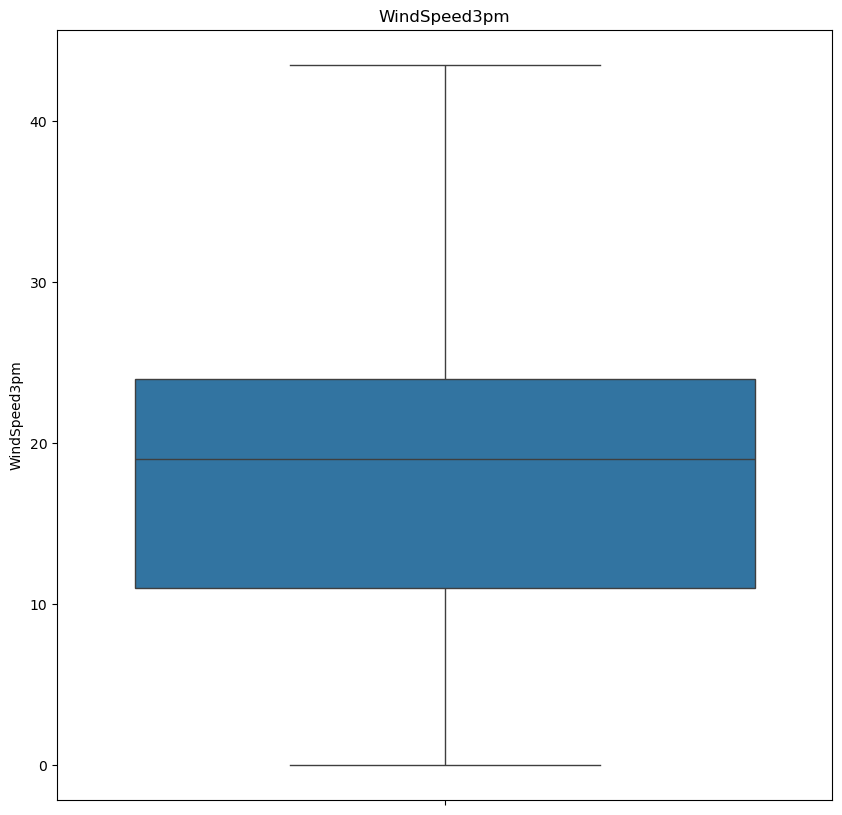

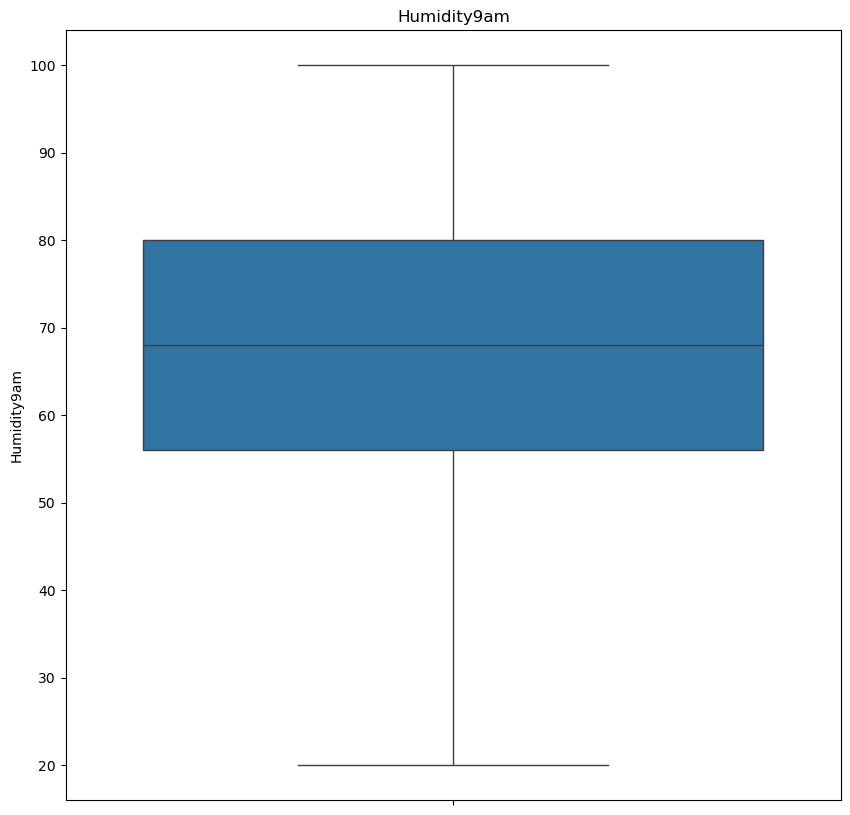

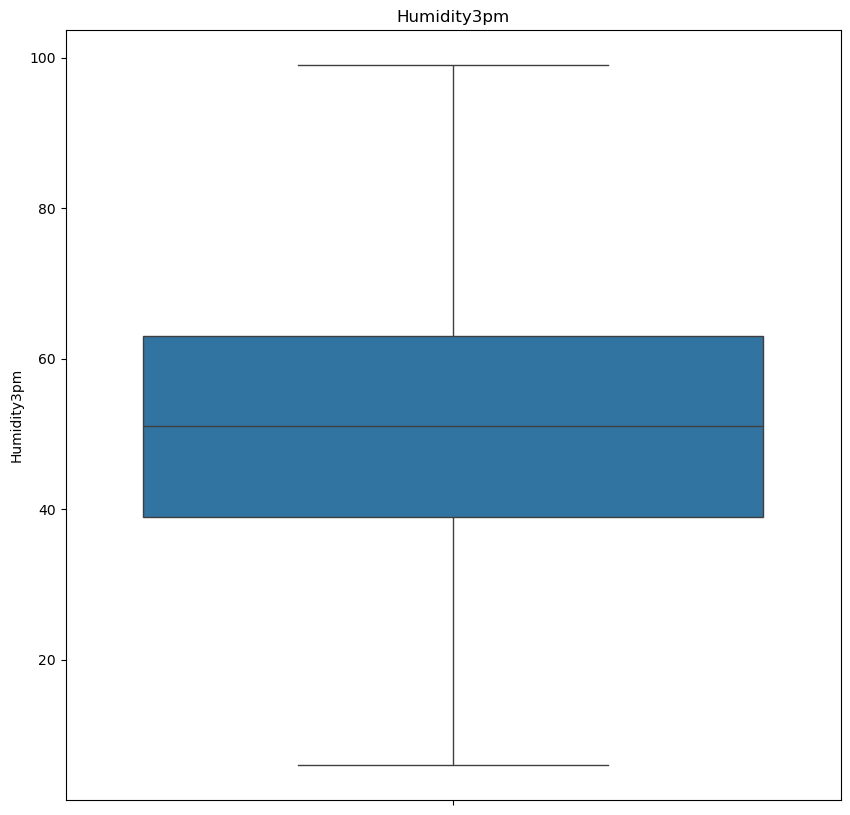

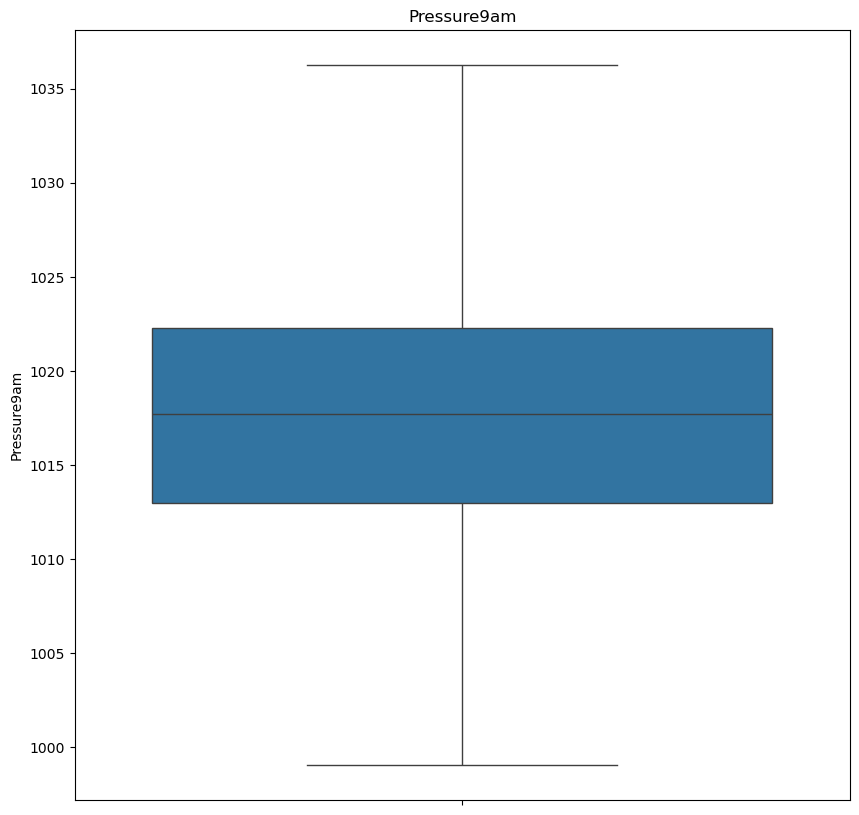

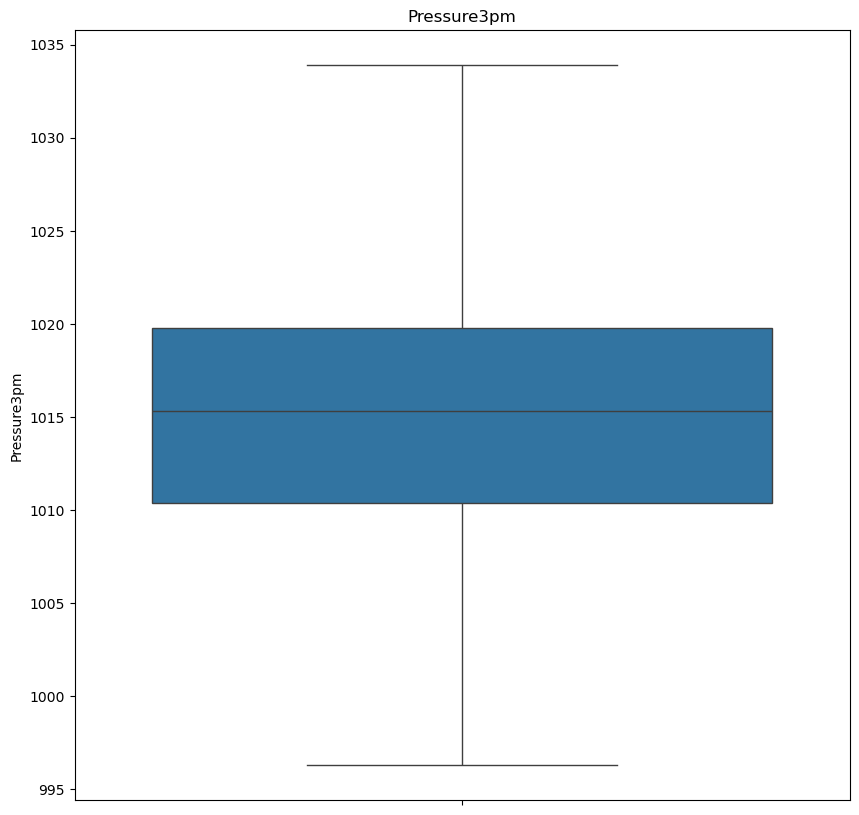

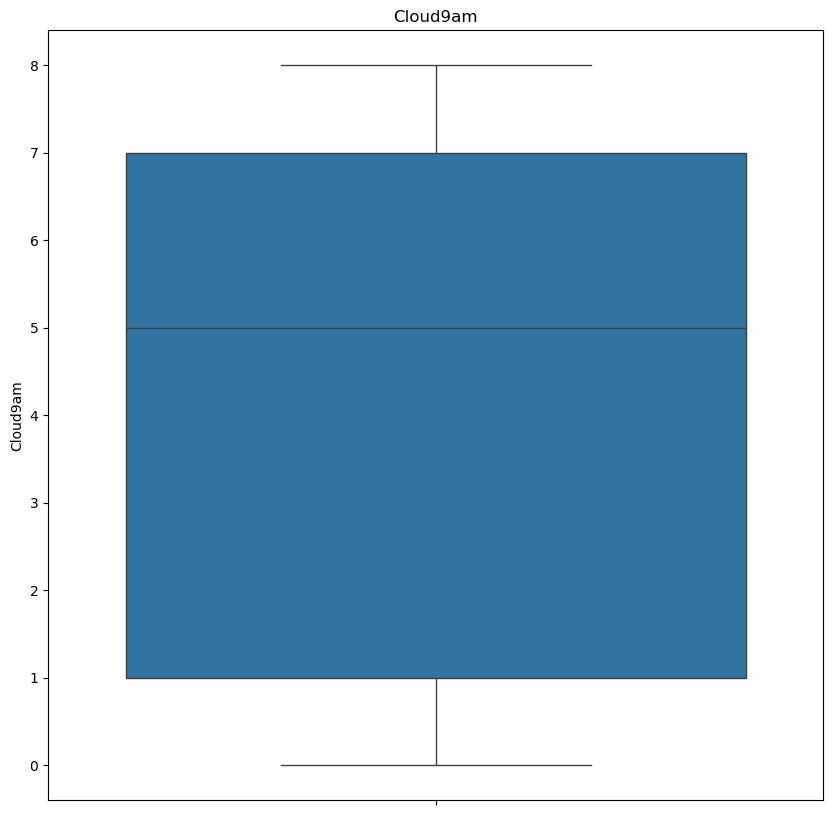

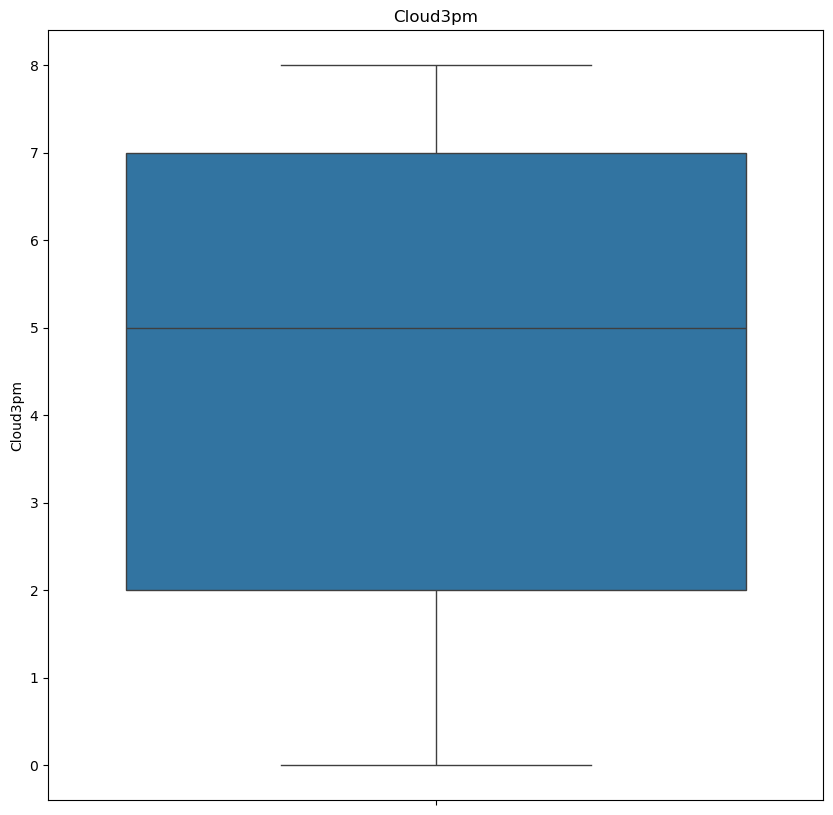

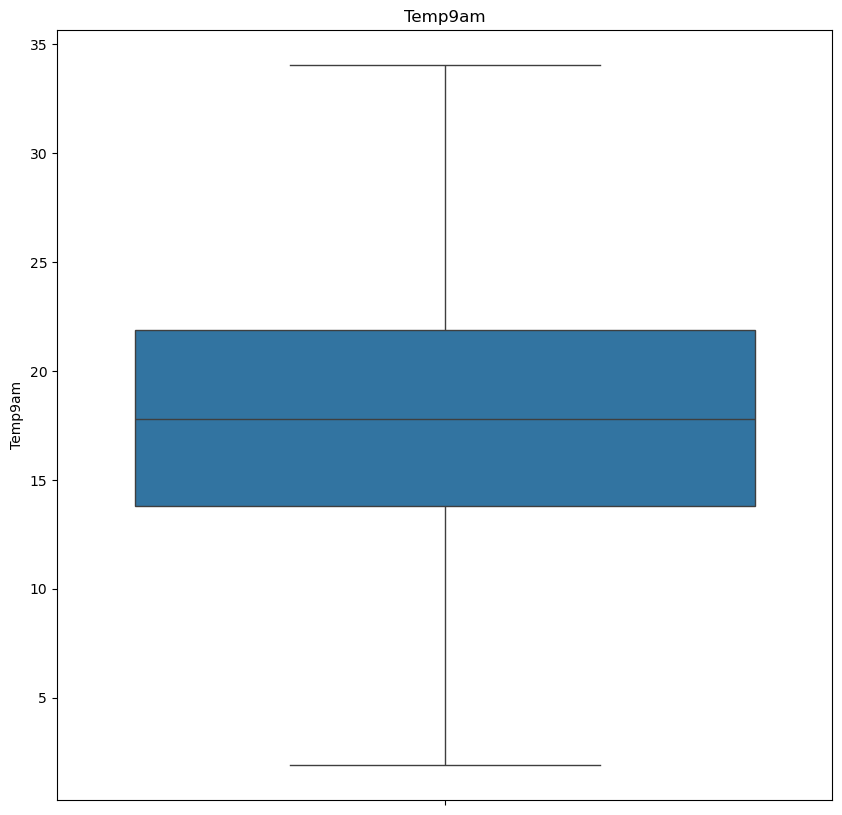

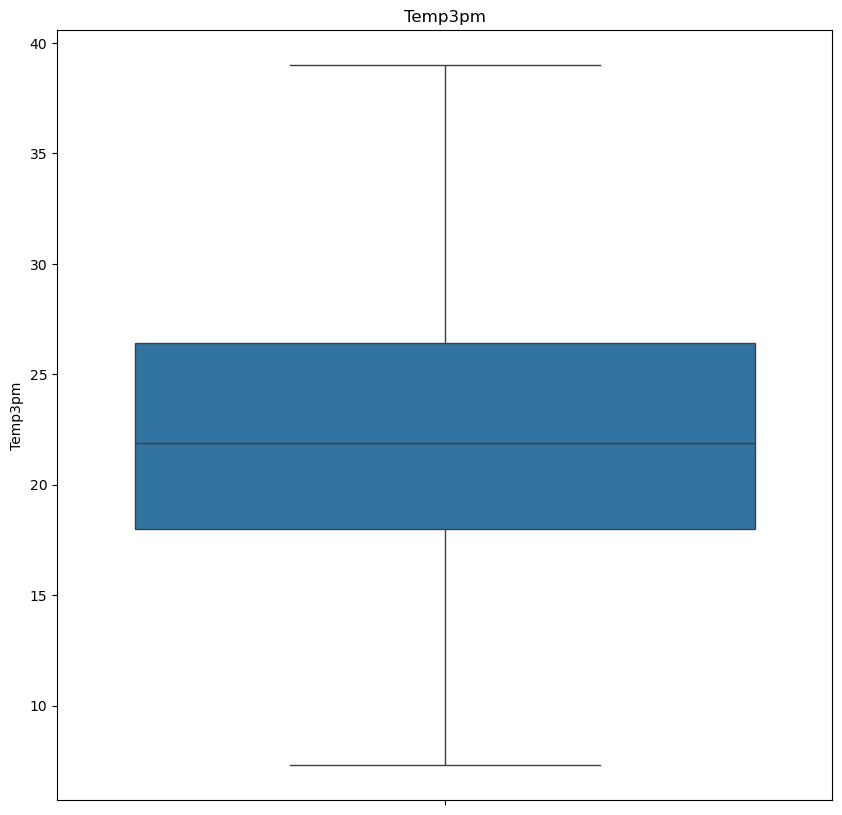

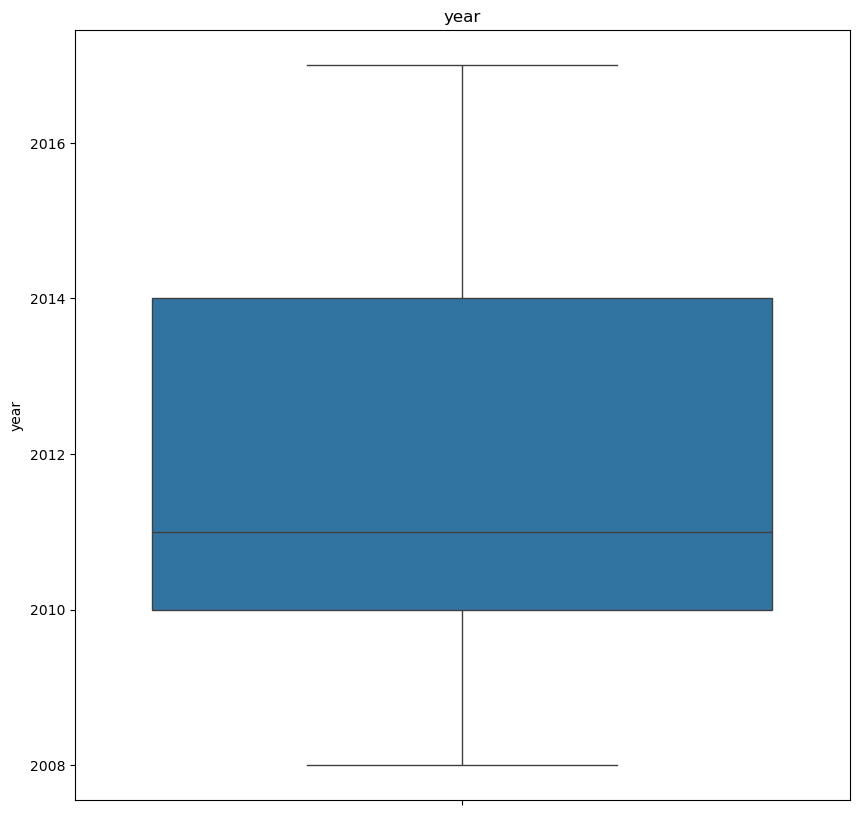

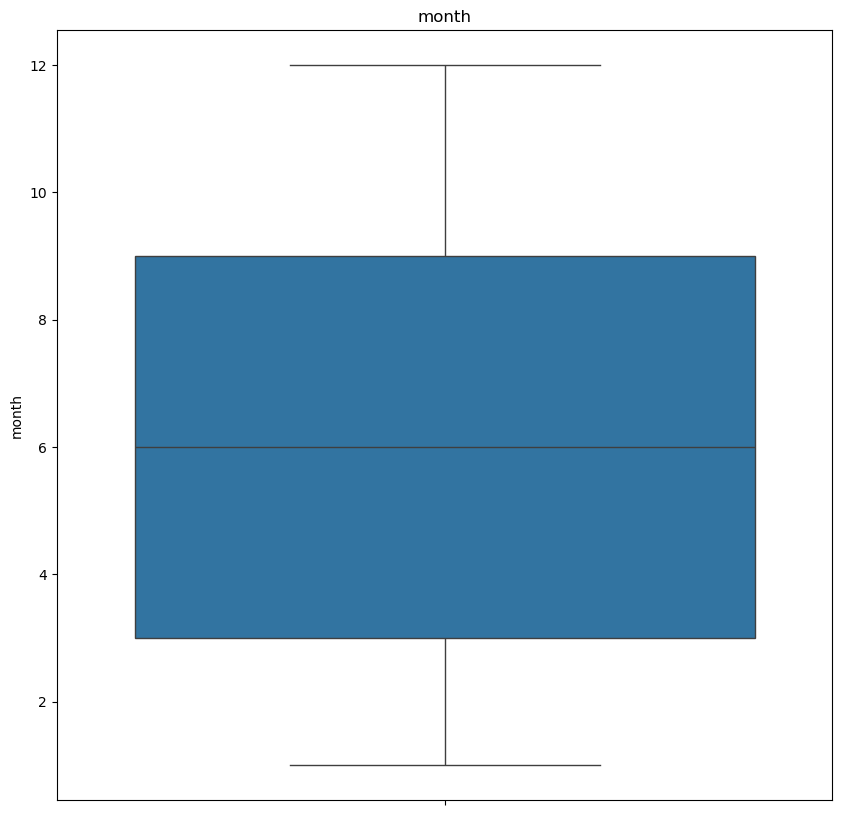

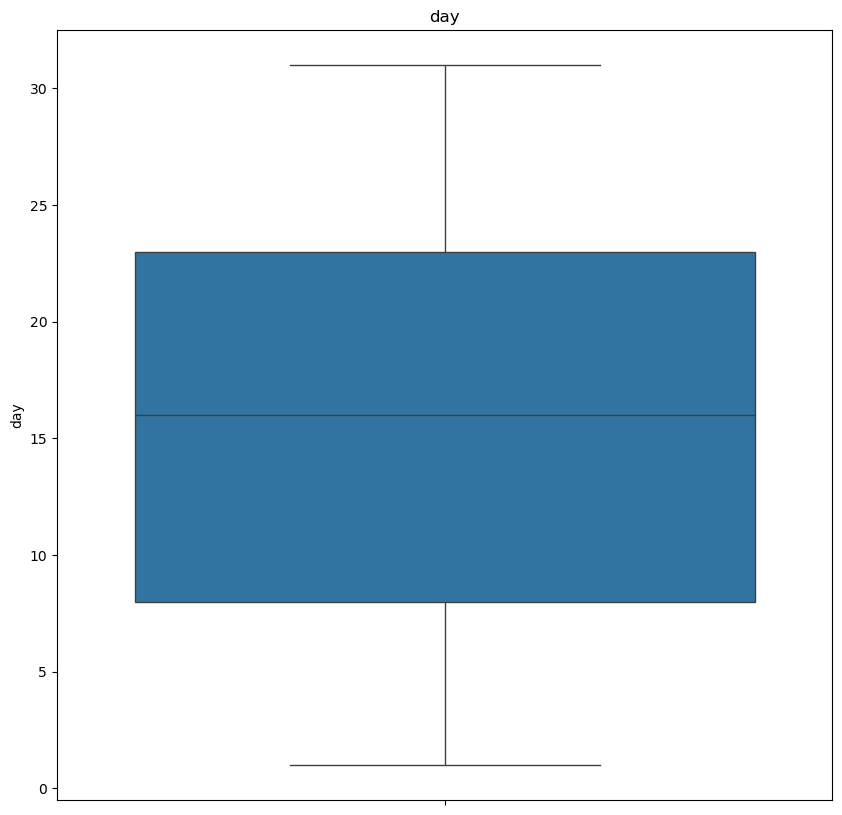

In [34]:
for feature in numerical_features:
    plt.figure(figsize=(10,10))
    sns.boxplot(df[feature])
    plt.title(feature)

In [35]:
numerical_features_with_null = [feature for feature in numerical_features if df[feature].isnull().sum()]
numerical_features_with_null

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [36]:
for feature in numerical_features_with_null:
    mean_value = df[feature].mean()
    df[feature].fillna(mean_value,inplace=True)

In [37]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
year             0
month            0
day              0
dtype: int64

In [38]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,5.119906,7.632205,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,5.119906,7.632205,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,5.119906,7.632205,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,5.119906,7.632205,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,5.119906,7.632205,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No,2008,12,5


<Axes: xlabel='RainTomorrow'>

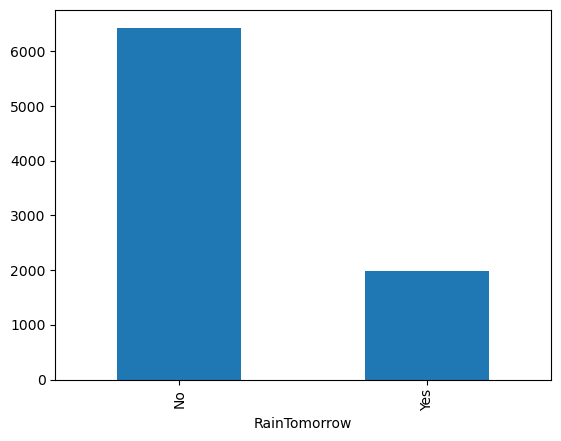

In [39]:
df['RainTomorrow'].value_counts().plot(kind='bar')

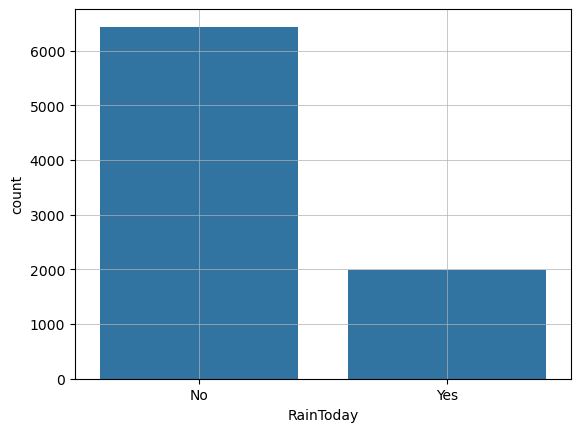

In [41]:
sns.countplot(data=df, x="RainToday")
plt.grid(linewidth = 0.5)
plt.show()

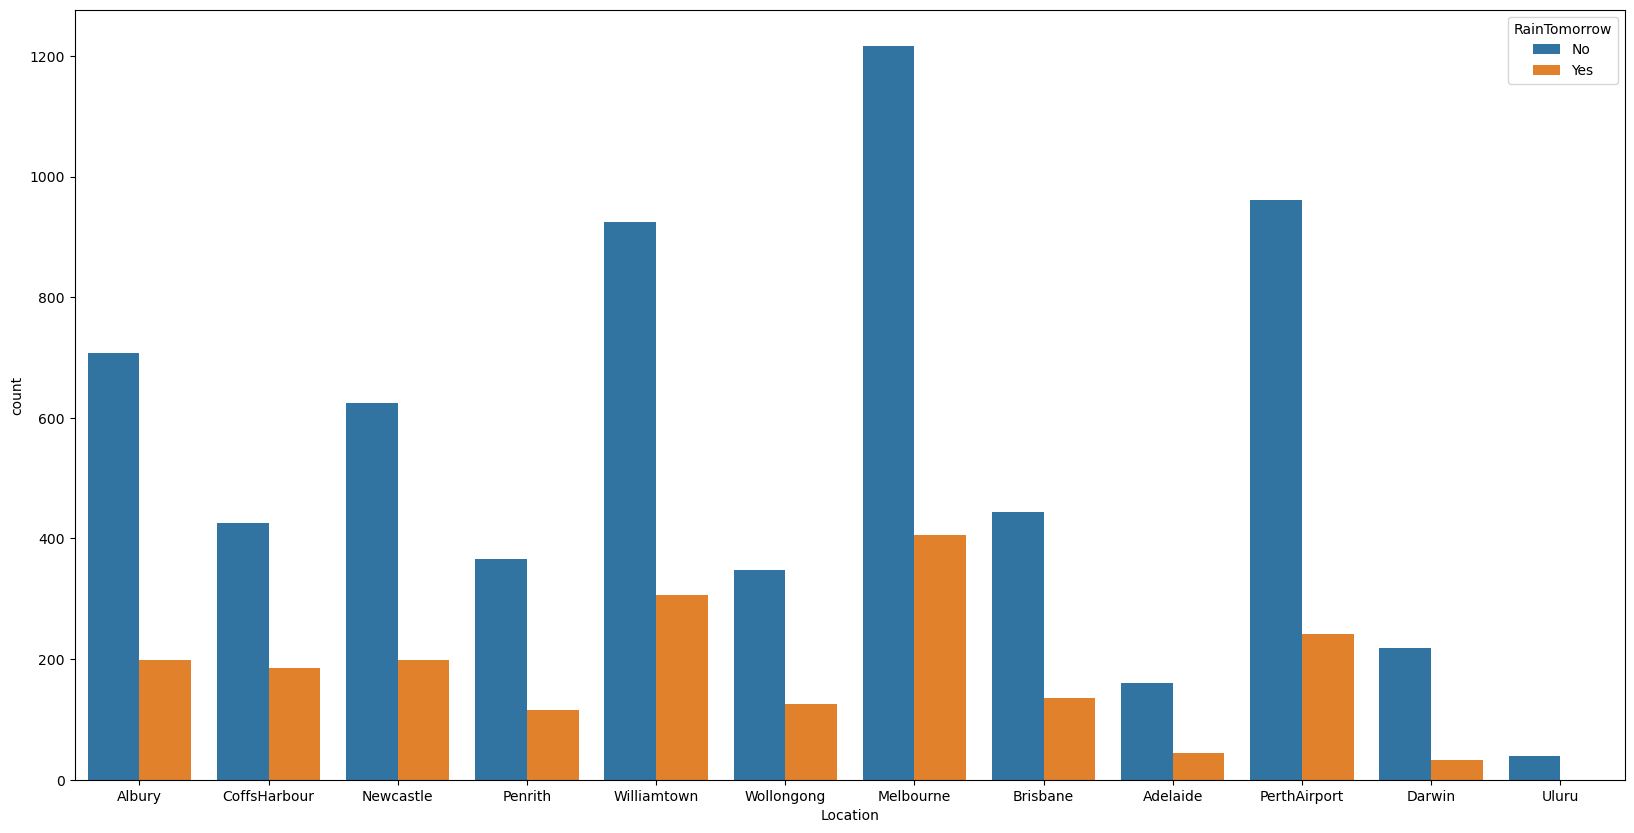

In [43]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x="Location", hue="RainTomorrow", data=df)

<Axes: xlabel='Sunshine', ylabel='Rainfall'>

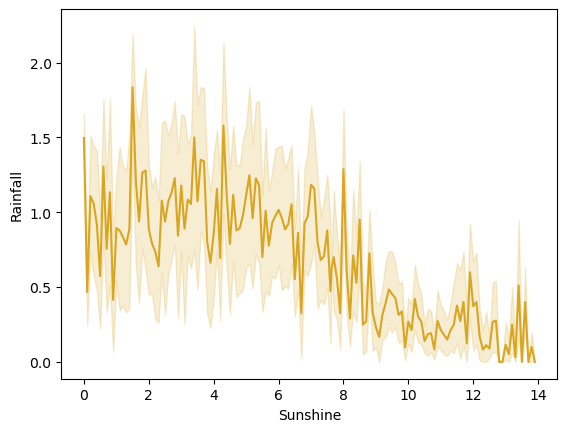

In [45]:
sns.lineplot(data=df,x='Sunshine',y='Rainfall',color='goldenrod')

array([[<Axes: title={'center': 'MinTemp'}>,
        <Axes: title={'center': 'MaxTemp'}>,
        <Axes: title={'center': 'Rainfall'}>,
        <Axes: title={'center': 'Evaporation'}>],
       [<Axes: title={'center': 'Sunshine'}>,
        <Axes: title={'center': 'WindGustSpeed'}>,
        <Axes: title={'center': 'WindSpeed9am'}>,
        <Axes: title={'center': 'WindSpeed3pm'}>],
       [<Axes: title={'center': 'Humidity9am'}>,
        <Axes: title={'center': 'Humidity3pm'}>,
        <Axes: title={'center': 'Pressure9am'}>,
        <Axes: title={'center': 'Pressure3pm'}>],
       [<Axes: title={'center': 'Cloud9am'}>,
        <Axes: title={'center': 'Cloud3pm'}>,
        <Axes: title={'center': 'Temp9am'}>,
        <Axes: title={'center': 'Temp3pm'}>]], dtype=object)

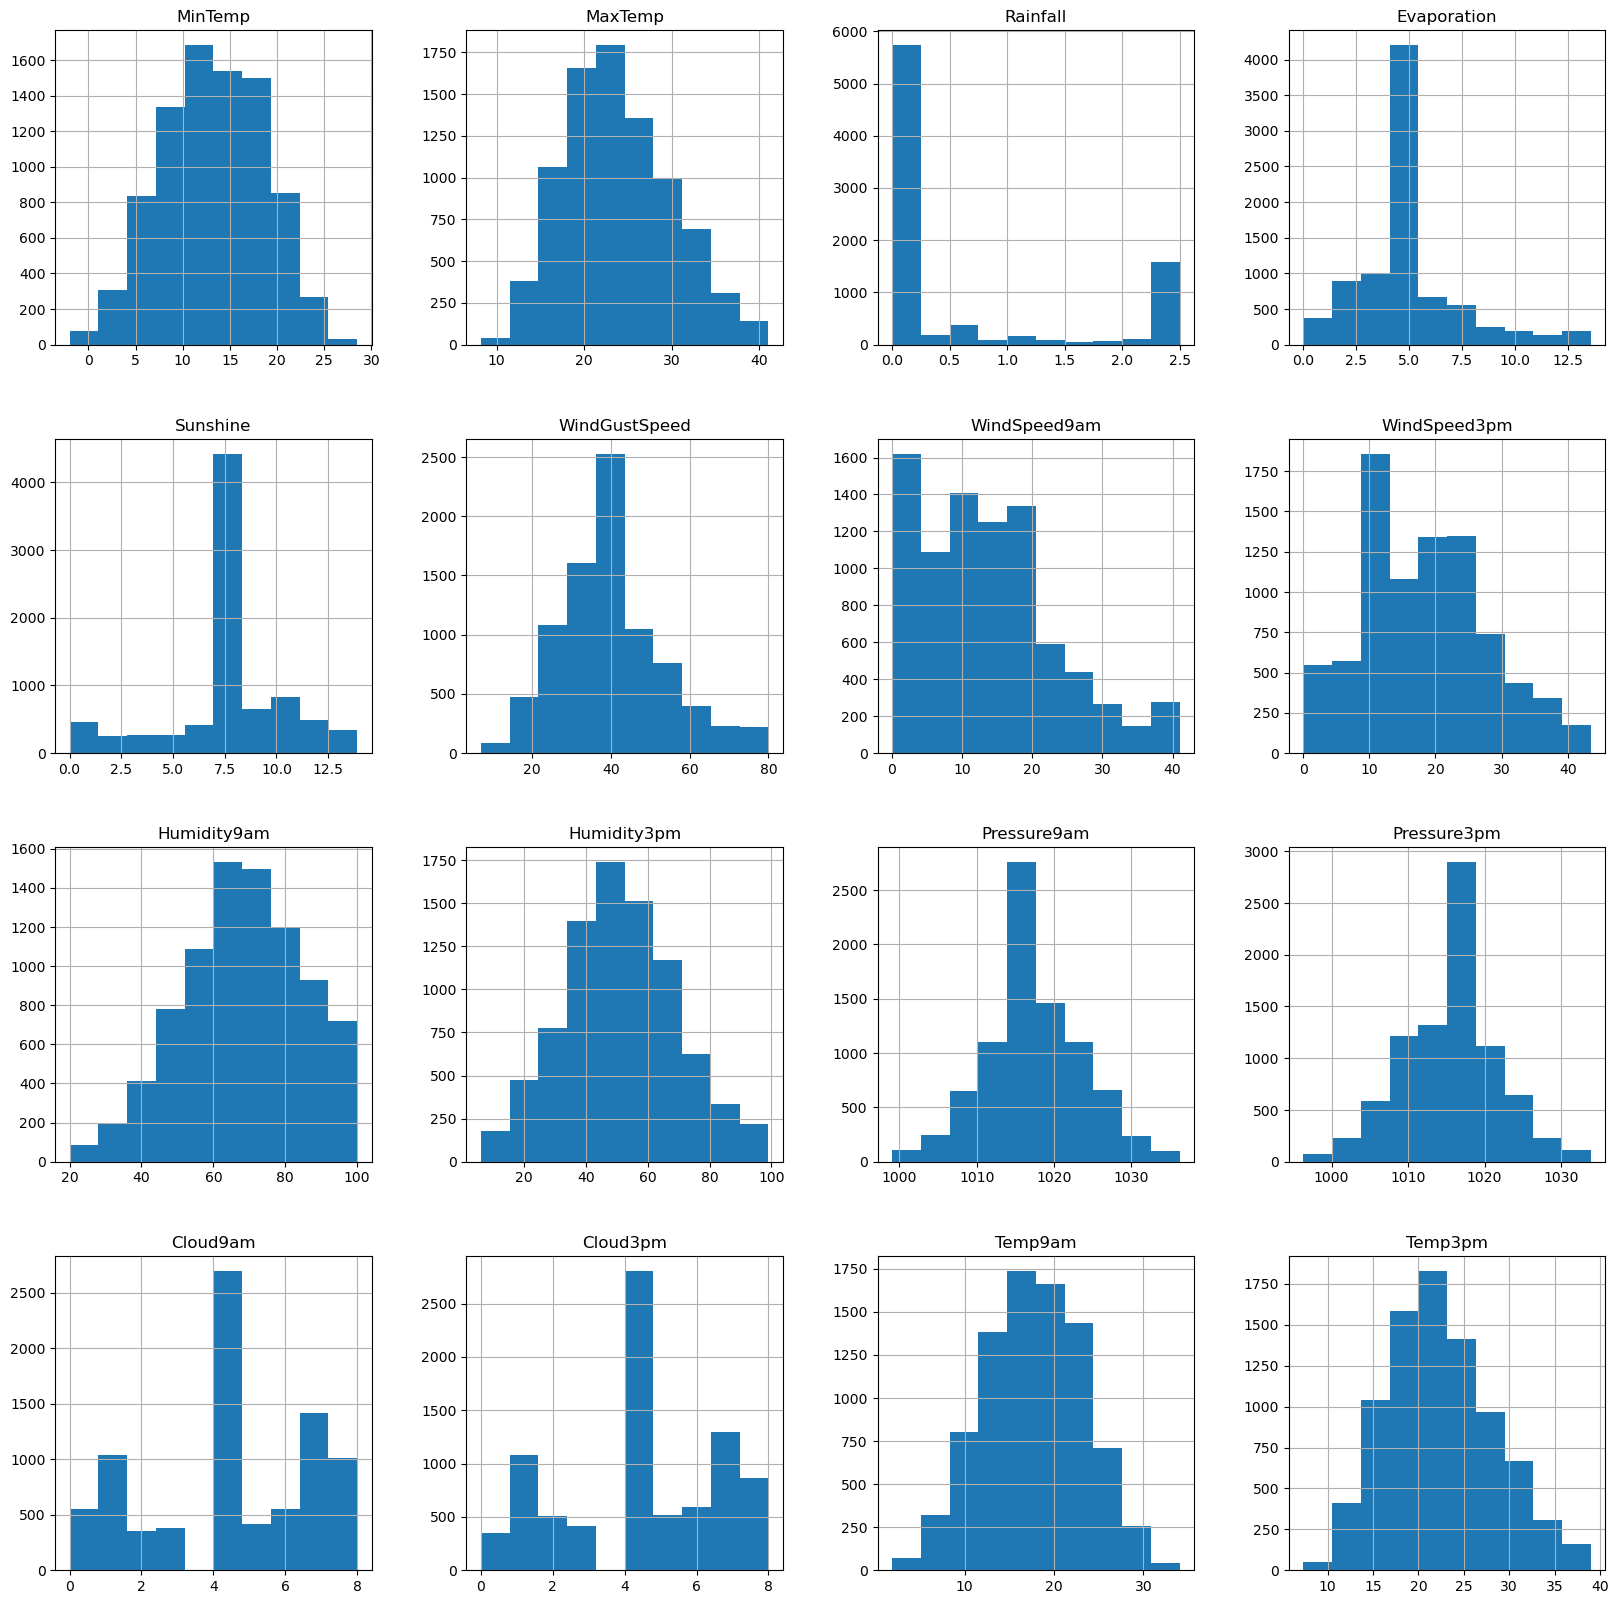

In [47]:
num_features = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
df[num_features].hist(bins=10,figsize=(20,20))

In [49]:
df.corr(numeric_only=True)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,year,month,day
MinTemp,1.000000,0.718001,0.075556,0.378765,0.056184,0.232307,0.139208,0.182028,-0.130330,0.079048,-0.431617,-0.425306,0.091604,0.038414,0.887190,0.686292,0.044123,-0.245854,0.009446
MaxTemp,0.718001,1.000000,-0.235267,0.471384,0.379266,0.140585,0.011687,0.090981,-0.390515,-0.421429,-0.328197,-0.406001,-0.254414,-0.250543,0.866698,0.974538,0.119702,-0.162506,0.015722
Rainfall,0.075556,-0.235267,1.000000,-0.164845,-0.255176,0.087183,0.045306,0.027078,0.404765,0.384859,-0.117617,-0.040890,0.307582,0.263521,-0.099851,-0.245436,0.003306,0.001672,-0.017648
Evaporation,0.378765,0.471384,-0.164845,1.000000,0.346654,0.208527,0.166081,0.132428,-0.332103,-0.240127,-0.260124,-0.272803,-0.117655,-0.147804,0.450422,0.458000,0.141970,-0.037221,0.015207
Sunshine,0.056184,0.379266,-0.255176,0.346654,1.000000,-0.012151,-0.017446,0.031878,-0.360958,-0.440268,0.020120,-0.037756,-0.533391,-0.547304,0.250559,0.396694,0.065374,-0.006694,0.004662
WindGustSpeed,0.232307,0.140585,0.087183,0.208527,-0.012151,1.000000,0.601377,0.640967,-0.271939,-0.092607,-0.404907,-0.369817,0.022342,0.078299,0.204029,0.103139,-0.041851,0.050826,-0.002990
WindSpeed9am,0.139208,0.011687,0.045306,0.166081,-0.017446,0.601377,1.000000,0.564137,-0.359724,-0.108080,-0.174375,-0.135352,0.000076,0.056551,0.110262,-0.004690,-0.089078,0.038560,-0.004590
WindSpeed3pm,0.182028,0.090981,0.027078,0.132428,0.031878,0.640967,0.564137,1.000000,-0.252167,-0.089889,-0.250575,-0.205115,0.006831,0.004431,0.187655,0.068461,-0.055169,0.047180,-0.008772
Humidity9am,-0.130330,-0.390515,0.404765,-0.332103,-0.360958,-0.271939,-0.359724,-0.252167,1.000000,0.633368,0.143685,0.175286,0.405018,0.297133,-0.377312,-0.382141,0.100039,-0.115279,0.003970
Humidity3pm,0.079048,-0.421429,0.384859,-0.240127,-0.440268,-0.092607,-0.108080,-0.089889,0.633368,1.000000,0.002390,0.071555,0.424348,0.439965,-0.130367,-0.490686,-0.028920,-0.074256,0.012512


<Axes: >

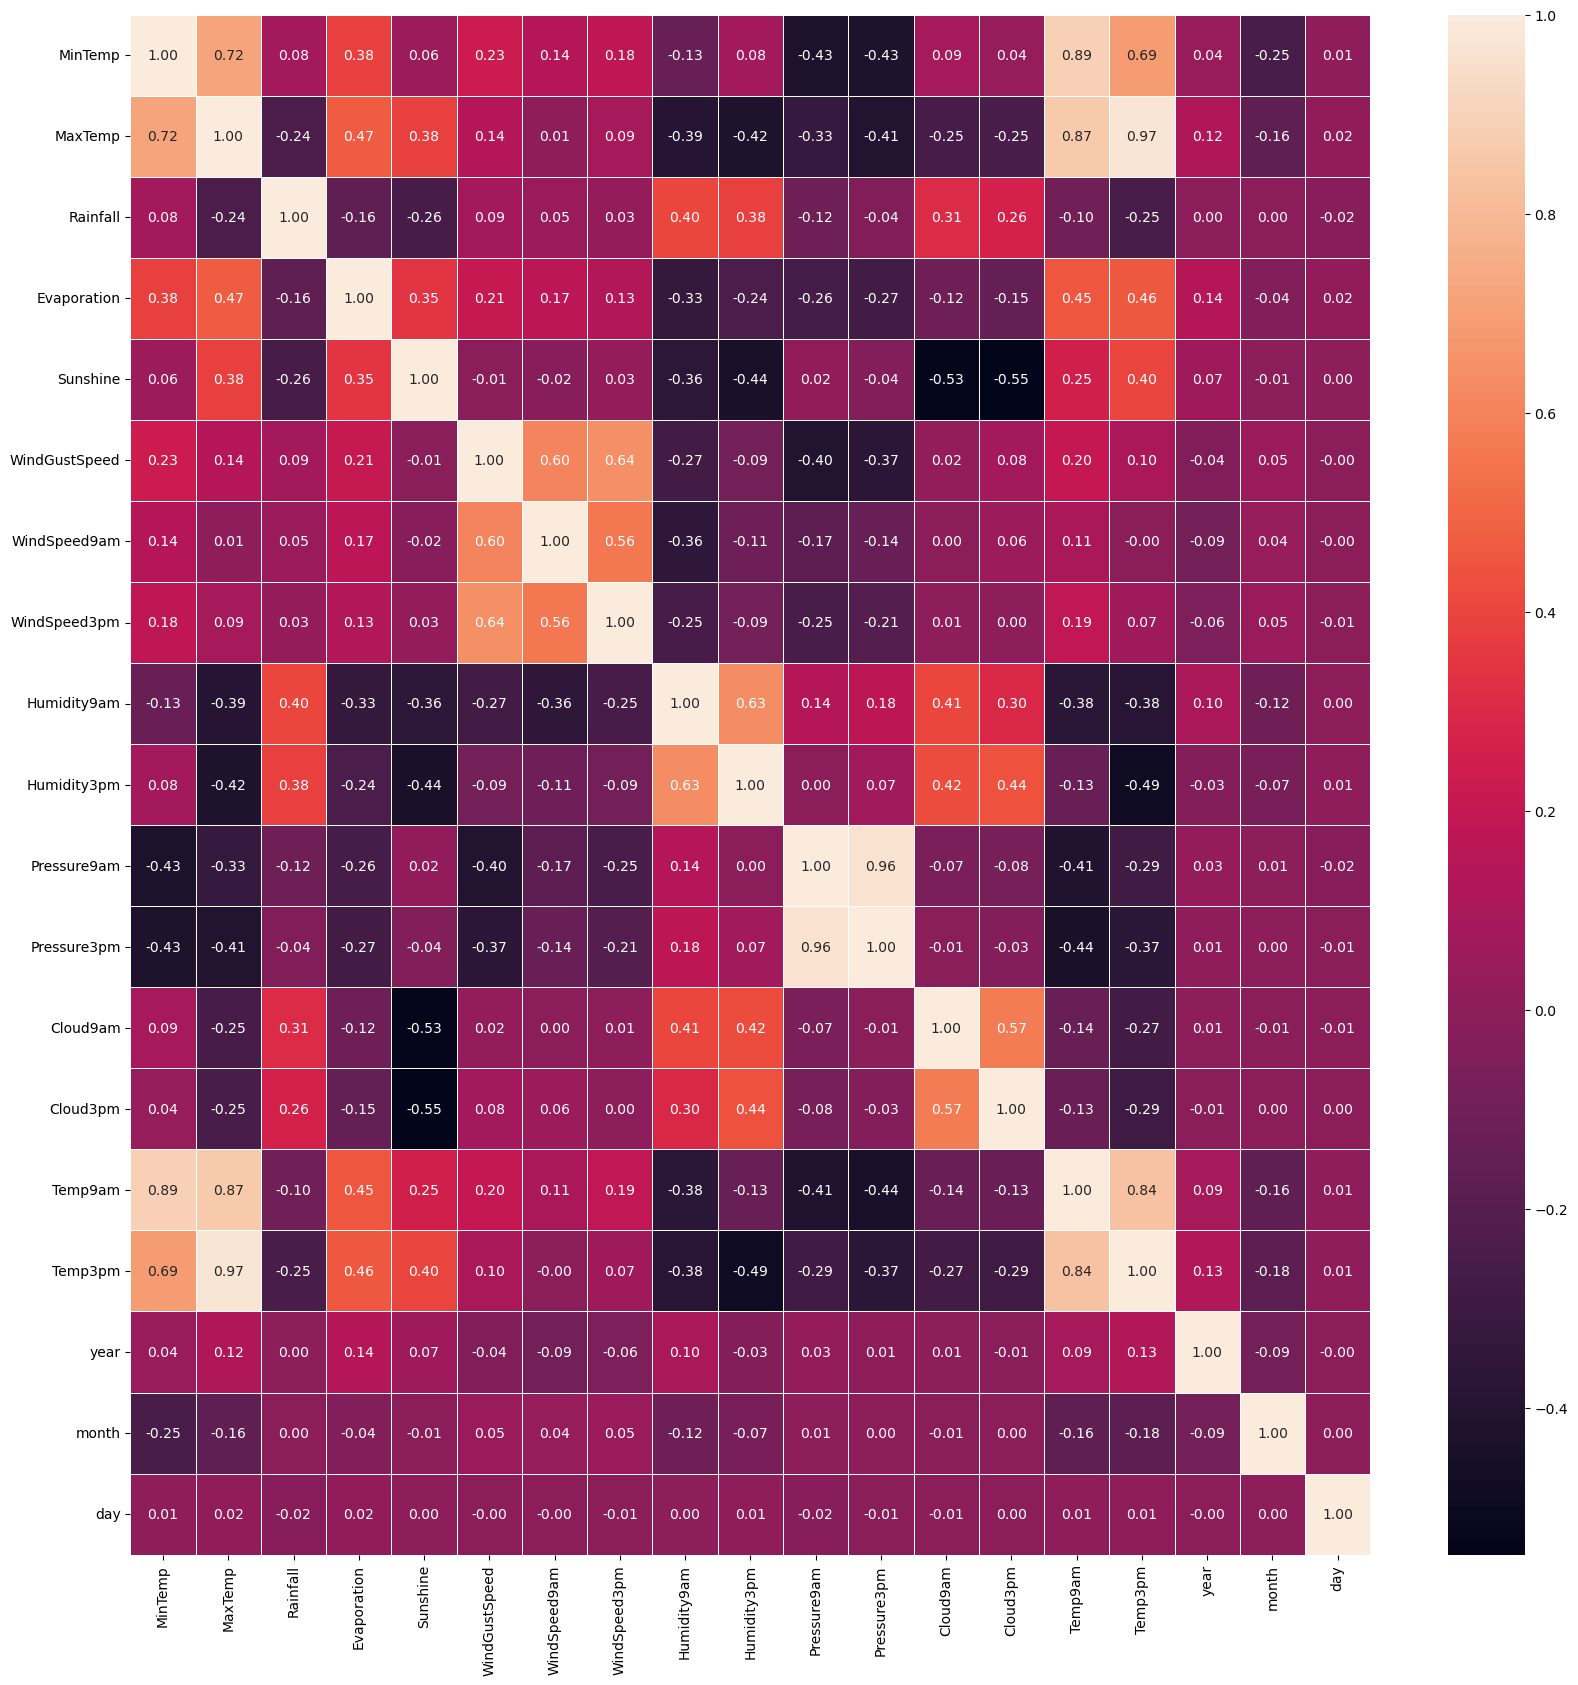

In [50]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(numeric_only=True),linewidths=0.5,annot=True,fmt=".2f")

In [51]:
categorical_features

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [52]:
df['RainToday'].replace({'No':0, 'Yes': 1}, inplace = True)
df['RainTomorrow'].replace({'No':0, 'Yes': 1}, inplace = True)

In [60]:
df['WindGustDir']=df['WindGustDir'].replace({0: 0, 'WNW': 1, 'WSW': 2, 'NE': 3, 'NNW': 4, 'N': 5, 'NNE': 6, 'SW': 7, 'ENE': 8, 'SSE': 9, 'S': 10, 'NW': 11, 'SE': 12, 'ESE': 13, 'E': 14, 'SSW': 15})

In [61]:
df['WindGustDir'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
      dtype=int64)

In [63]:
df['WindDir9am']=df['WindDir9am'].replace({'W': 0, 'NNW': 1, 'SE': 2, 'ENE': 3, 'SW': 4, 'SSE': 5, 'S': 6, 'NE': 7, 'N': 8, 'SSW': 9, 'WSW': 10, 'ESE': 11, 'E': 12, 'NW': 13, 'WNW': 14, 'NNE': 15})

In [64]:
df['WindDir3pm']=df['WindDir3pm'].replace({'WNW': 0, 'WSW': 1, 'E': 2, 'NW': 3, 'W': 4, 'SSE': 5, 'ESE': 6, 'ENE': 7, 'NNW': 8, 'SSW': 9, 'SW': 10, 'SE': 11, 'N': 12, 'S': 13, 'NNE': 14, 'NE': 15})

In [67]:
df['Location'].unique()

array(['Albury', 'CoffsHarbour', 'Newcastle', 'Penrith', 'Williamtown',
       'Wollongong', 'Melbourne', 'Brisbane', 'Adelaide', 'PerthAirport',
       'Darwin', 'Uluru'], dtype=object)

In [68]:
df['Location']=df['Location'].replace({'Albury':1, 'CoffsHarbour':2, 'Newcastle':3, 'Penrith':4, 'Williamtown':5,
       'Wollongong':6, 'Melbourne':7, 'Brisbane':8, 'Adelaide':9, 'PerthAirport':10,
       'Darwin':11, 'Uluru':12})

In [69]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,1,13.4,22.9,0.6,5.119906,7.632205,0,44.0,0,0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0,0,2008,12,1
1,1,7.4,25.1,0.0,5.119906,7.632205,1,44.0,1,1,4.0,22.0,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0,0,2008,12,2
2,1,12.9,25.7,0.0,5.119906,7.632205,2,46.0,0,1,19.0,26.0,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0,0,2008,12,3
3,1,9.2,28.0,0.0,5.119906,7.632205,3,24.0,2,2,11.0,9.0,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0,0,2008,12,4
4,1,17.5,32.3,1.0,5.119906,7.632205,0,41.0,3,3,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0,2008,12,5


In [71]:
X = df.drop(['RainTomorrow'],axis=1)
Y = df['RainTomorrow']

In [72]:
Y.value_counts()

RainTomorrow
0    6434
1    1991
Name: count, dtype: int64

In [73]:
from imblearn.over_sampling import SMOTE

In [74]:
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [75]:
Y.value_counts()

RainTomorrow
0    6434
1    6434
Name: count, dtype: int64

In [76]:
from sklearn.preprocessing import StandardScaler

In [77]:
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [78]:
from sklearn.decomposition import PCA

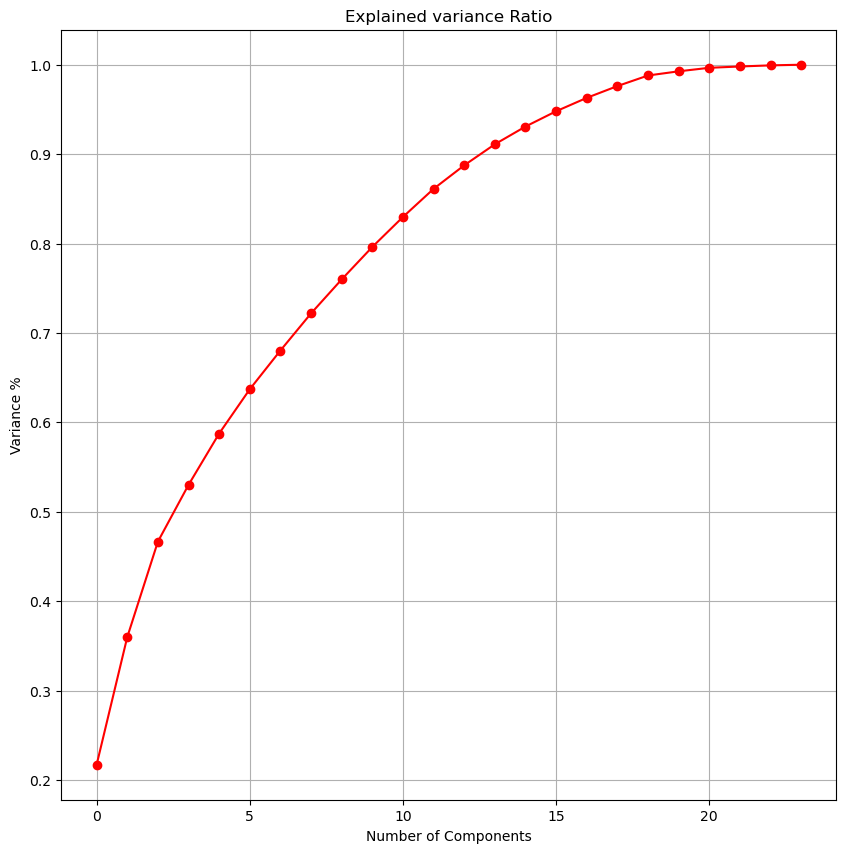

In [79]:
pca = PCA()
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

In [80]:
pca_new = PCA(n_components=20)
x_new = pca_new.fit_transform(X_scale)

In [81]:
principle_x=pd.DataFrame(x_new,columns=np.arange(20))

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [83]:
x_new

array([[ 0.52190841,  1.00105076,  1.94046933, ...,  0.26882065,
        -0.74005783,  0.68104935],
       [ 1.21185194, -0.62616693,  1.98099446, ..., -0.52859928,
         0.39050541, -0.34541957],
       [ 2.15922648,  0.10942035,  2.4331465 , ..., -0.53689659,
         0.37571815, -0.00616706],
       ...,
       [ 1.63688098,  0.11882608,  0.43882739, ...,  0.34484986,
        -0.31170542,  0.01493552],
       [ 2.50207558,  0.13834532, -2.29121775, ..., -0.03305069,
        -0.10100859, -0.08108986],
       [-2.95559497,  0.9027457 , -1.01928389, ...,  0.78448313,
        -0.45113364,  0.37725152]])

In [84]:
principle_x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.521908,1.001051,1.940469,-2.575918,-0.328099,1.661664,0.261603,-2.247639,1.163532,1.466250,-1.399608,-0.665255,0.962068,-0.059218,-1.205411,0.191828,1.011155,0.268821,-0.740058,0.681049
1,1.211852,-0.626167,1.980994,-3.014750,-0.292145,1.762920,0.331441,-2.173281,1.123382,0.975813,-1.283256,-0.694395,1.023478,0.313232,-0.233358,-0.210175,-0.378898,-0.528599,0.390505,-0.345420
2,2.159226,0.109420,2.433147,-2.183298,-0.330148,2.191450,0.306351,-1.970074,0.849953,0.931952,-1.165589,-0.850948,1.047065,-0.342990,0.132614,0.644753,0.952460,-0.536897,0.375718,-0.006167
3,1.291333,-1.879091,0.772758,-2.191392,-0.392907,1.741030,0.763653,-1.883921,1.581983,0.510232,-1.921247,-0.873302,0.711562,0.985087,0.261740,0.073898,0.438521,-0.049316,-0.486501,-0.215301
4,1.073075,1.372511,-0.198107,-2.850515,-0.773528,1.220318,0.041861,-1.740319,1.313893,0.432811,-2.037675,-0.428337,1.083831,-0.052168,-1.056415,-0.899290,-0.437802,0.545037,-1.278002,0.391067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12863,-1.681354,2.503501,-0.864270,-1.696090,-0.533251,1.631547,0.943628,0.862388,-0.363209,-0.078310,-0.529675,0.158383,1.099364,0.854044,-0.044912,0.335185,-0.001125,-0.256864,-0.680178,-0.519456
12864,-1.346928,3.687088,-3.748445,0.200585,-0.069114,-0.902771,1.984299,1.304015,-0.599332,-1.094684,0.630491,-0.703323,0.152560,0.341330,0.240215,0.431402,-0.568536,-0.467982,0.300878,-0.127970
12865,1.636881,0.118826,0.438827,-0.478888,-0.129597,0.164587,-0.080165,-0.913112,-0.353390,0.774517,0.201363,0.972283,1.125813,0.173715,-0.371406,1.483118,-0.105647,0.344850,-0.311705,0.014936
12866,2.502076,0.138345,-2.291218,-1.301005,0.183984,0.242571,1.605473,-1.078966,-0.818070,0.431515,-0.153896,-0.061312,-0.998502,-0.710473,-0.838005,-0.171373,0.719238,-0.033051,-0.101009,-0.081090


In [85]:
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(principle_x,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.7793317793317793 on Random_state 36


In [86]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=36, test_size=.3)

In [87]:
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.7793317793317793


Confusion matrix of Logistics Regression : 
 [[1514  413]
 [ 439 1495]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.78      0.79      0.78      1927
           1       0.78      0.77      0.78      1934

    accuracy                           0.78      3861
   macro avg       0.78      0.78      0.78      3861
weighted avg       0.78      0.78      0.78      3861



In [88]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error

In [90]:
rmse_val = [] 
for K in range(12):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)
    model.fit(X_train,Y_train)
    y_pred=model.predict(X_test)
    error = sqrt(mean_squared_error(Y_test,y_pred))
    rmse_val.append(error)
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.2759457847949052
RMSE value for k=  2 is: 0.2847228144478083
RMSE value for k=  3 is: 0.34591634777518054
RMSE value for k=  4 is: 0.3474105938138915
RMSE value for k=  5 is: 0.3648645407903228
RMSE value for k=  6 is: 0.36415399573275675
RMSE value for k=  7 is: 0.3798198839754763
RMSE value for k=  8 is: 0.37708240769245943
RMSE value for k=  9 is: 0.39024627133664236
RMSE value for k=  10 is: 0.3919019693586058
RMSE value for k=  11 is: 0.4036225500528469
RMSE value for k=  12 is: 0.39519255582204


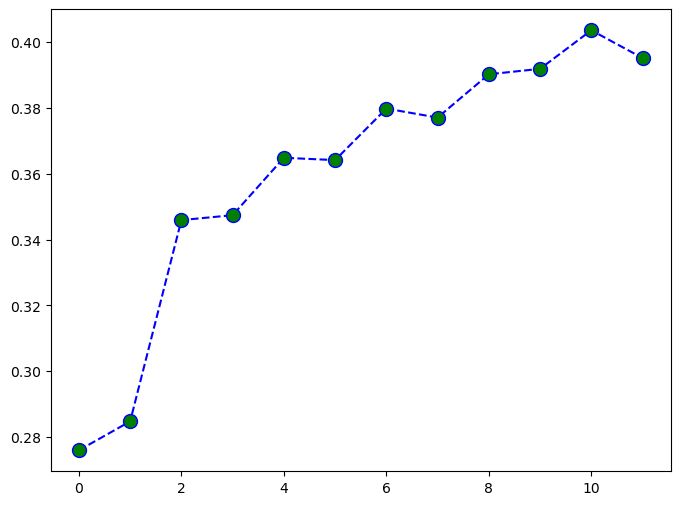

In [91]:
plt.figure(figsize = (8,6))
plt.plot(range(12), rmse_val, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)

In [92]:
model=[ LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))

Classification ML Algorithm Evaluation Matrix LogisticRegression() is


Accuracy Score :
 0.7793317793317793


Confusion matrix : 
 [[1514  413]
 [ 439 1495]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.78      0.79      0.78      1927
           1       0.78      0.77      0.78      1934

    accuracy                           0.78      3861
   macro avg       0.78      0.78      0.78      3861
weighted avg       0.78      0.78      0.78      3861

Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.8598808598808598


Confusion matrix : 
 [[1612  315]
 [ 226 1708]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.88      0.84      0.86      1927
           1       0.84      0.88      0.86      1934

    accuracy                           0.86      3861
   macro avg       0.86      0.86      0.86      3861
weighted avg       0.86      0.86      0.8

In [93]:
from sklearn.model_selection import cross_val_score

In [94]:
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

In [95]:
for m in model:
    score = cross_val_score(m, principle_x, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('==============================')



Cross Validation Score LogisticRegression() :

Score : [0.65190365 0.59168609 0.67715618 0.73804897 0.78080062]
Mean Score : 0.6879191025323944
Std deviation : 0.06605108003993952




Cross Validation Score SVC() :

Score : [0.52797203 0.64102564 0.77738928 0.8017878  0.73804897]
Mean Score : 0.6972447425614934
Std deviation : 0.10082779460283599




Cross Validation Score GaussianNB() :

Score : [0.7004662  0.61072261 0.69191919 0.72638943 0.76564322]
Mean Score : 0.6990281299647798
Std deviation : 0.05106208064982109




Cross Validation Score DecisionTreeClassifier() :

Score : [0.65345765 0.76146076 0.86013986 0.85075787 0.76136805]
Mean Score : 0.7774368396210602
Std deviation : 0.07496671622779746




Cross Validation Score KNeighborsClassifier(n_neighbors=3) :

Score : [0.64024864 0.68492618 0.82517483 0.79168286 0.77069569]
Mean Score : 0.742545639358698
Std deviation : 0.06902050641339821




Cross Validation Score RandomForestClassifier() :

Score : [0.70551671 0.77661228 0

In [96]:
from sklearn.model_selection import GridSearchCV

In [97]:
parameter= {'criterion' : ['gini', 'entropy'],
              'min_samples_split':[3,5,8],
              'max_depth' : [20,30,40],
              'n_estimators' : [10, 15, 20]
             }

In [98]:
GCV = GridSearchCV(ExtraTreesClassifier(),parameter,verbose=10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=10
[CV 1/5; 1/54] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=10;, score=0.876 total time=   0.0s
[CV 2/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=10
[CV 2/5; 1/54] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=10;, score=0.876 total time=   0.1s
[CV 3/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=10
[CV 3/5; 1/54] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=10;, score=0.873 total time=   0.0s
[CV 4/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=10
[CV 4/5; 1/54] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=10;, score=0.869 total time=   0.0s
[CV 5/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=10
[CV 5/5; 1/54] END cri

GridSearchCV(estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [20, 30, 40],
                         'min_samples_split': [3, 5, 8],
                         'n_estimators': [10, 15, 20]},
             verbose=10)

In [99]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 30,
 'min_samples_split': 3,
 'n_estimators': 20}

In [100]:
Final_mod = ExtraTreesClassifier(criterion='gini',n_estimators= 30, max_depth=30 ,min_samples_split= 3)
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.933954933954934


In [101]:
from sklearn.metrics import roc_curve,auc,RocCurveDisplay

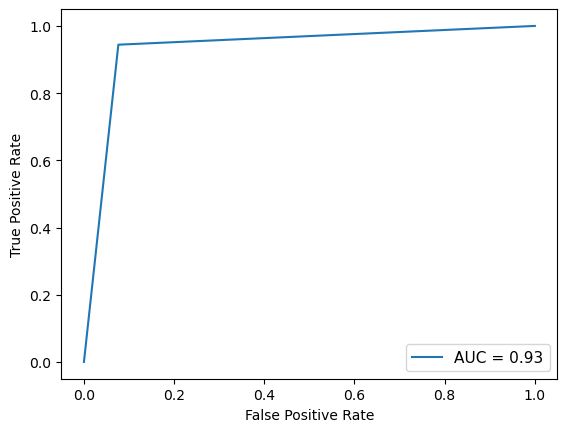

In [102]:
fpr,tpr,threshold=roc_curve(Y_test,y_pred)
roc_auc=auc(fpr,tpr)
display=RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc)
display.plot()  
plt.legend(prop={'size':11}, loc='lower right')
plt.show()

In [103]:
import joblib
joblib.dump(Final_mod,'Rainfall_Prediction_Final.pkl')

['Rainfall_Prediction_Final.pkl']

In [104]:
model=joblib.load("Rainfall_Prediction_Final.pkl")
prediction=model.predict(X_test)
prediction

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [105]:
a=np.array(Y_test)
df1=pd.DataFrame()
df1['Predicted']=prediction
df1['Actual']=a
df1

,Predicted,Actual
0,0,0
1,1,1
2,0,0
3,1,1
4,1,1
...,...,...
3856,1,1
3857,1,1
3858,1,1
3859,1,1
